# Major Project - 2 : IPL

## IPL Analysis by Mohammed Khundmeer Siddiq

## To Do:
- What was the count of matches played in each season?
- How many runs were scored in each season?
- What were the runs scored per match in different seasons?
- Who has umpired the most?
- Which team has won the most tosses?
- What does the team decide after winning the toss?
- How does the toss decision vary across seasons?
- Does winning the toss imply winning the game?
- How many times has the chasing team won the match?
- Which all teams had won this tournament?
- Which team has played the most number of matches?
- Which team has won the most number of times?
- Which team has the highest winning percentage?
- Is there any lucky venue for a particular team?
- Innings wise comparison between teams
- Which team has scored the most number of 200+ scores?
- Which team has conceded 200+ scores the most?
- What was the highest run scored by a team in a single match?
- Which is the biggest win in terms of run margin?
- Which batsmen have played the most number of balls?
- Who are the leading run-scorers of all time?
- Who has hit the most number of 4's?
- Who has hit the most number of 6's?
- Who has the highest strike rate?
- Who is the leading wicket-taker?
- Which stadium has hosted the most number of matches?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_matches = pd.read_csv('IPL Matches 2008-2020.csv')
df_ball_by_ball = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

### Analyzing ball by ball dataset

In [3]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [4]:
df_ball_by_ball.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [5]:
df_ball_by_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [6]:
df_ball_by_ball['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [7]:
df_ball_by_ball['player_dismissed'].unique()

array([nan, 'RT Ponting', 'DJ Hussey', 'SC Ganguly', 'MV Boucher',
       'B Akhil', 'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi',
       'JH Kallis', 'W Jaffer', 'R Dravid', 'V Kohli', 'SK Raina',
       'JDP Oram', 'PA Patel', 'ML Hayden', 'MS Dhoni', 'JR Hopes',
       'Yuvraj Singh', 'KC Sangakkara', 'K Goel', 'SK Warne', 'V Sehwag',
       'T Kohli', 'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif',
       'M Rawat', 'RA Jadeja', 'DJ Thornely', 'L Ronchi', 'ST Jayasuriya',
       'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock', 'S Chanderpaul',
       'LRPL Taylor', 'BB McCullum', 'WP Saha', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'Y Venugopal Rao',
       'VVS Laxman', 'AC Gilchrist', 'RG Sharma', 'SB Styris',
       'Mohammad Hafeez', 'Kamran Akmal', 'DPMD Jayawardene', 'IK Pathan',
       'B Lee', 'S Sohal', 'G Gambhir', 'Shahid Afridi', 'MEK Hussey',
       'Harbhajan Singh', 'DJ Bravo', 'MA Khote', 'GC Smith',
       'D Salunkhe', 'PP Chawla',

In [8]:
df_ball_by_ball['extras_type'].unique()

array([nan, 'byes', 'wides', 'legbyes', 'noballs', 'penalty'],
      dtype=object)

## Inference:
- Could not find any null values that could be filled with 0.0 or mean
- The one field that I found was important and missing in some were the bowling team especially when batting team had 0 na
- If it requires pre processing, will see later

### Analyzing matches dataset

In [9]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [10]:
df_matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [11]:
df_matches['team1'].nunique()

15

In [12]:
df_matches['team2'].nunique()

15

## Observation:
- We can see that a team Rising Pune Supergiants is being miss spelled and thius is highlighted as 2 names
- Let us fix this under the correct name

In [13]:
df_matches['team1'] = df_matches['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df_matches['team2'] = df_matches['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [14]:
df_matches['team1'].nunique()

14

In [15]:
df_matches['team2'].nunique()

14

## Inference:
- Total unique values reduced to 14, hence the problem is solved

In [16]:
df_matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

## Inference:
- Result margin has 17 na
- It can be filled with mean if needed
- Other na values did not seem important to fill

## 1. What was the count of matches played in each season?

In [17]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [18]:
year = []
for i in df_matches.values:
    year.append(i[2][:4])
year

['2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 

In [19]:
df_matches['season'] = year
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [20]:
df_seasonwise = pd.DataFrame(df_matches.groupby('season').size().reset_index())
df_seasonwise.columns = ['season', 'total_matches']
df_seasonwise.sort_values(by = 'total_matches', ascending = False)

,season,total_matches
5,2013,76
4,2012,74
3,2011,73
2,2010,60
6,2014,60
8,2016,60
10,2018,60
11,2019,60
12,2020,60
7,2015,59


In [21]:
df_seasonwise['total_matches'].mean()

62.76923076923077

## Inference:
- Most matches were played in 2013 season
- Nearly 60 matches played in every season
- On an average, 62 matches were played in every season

### Bar Graph and Scatter Plot Visualization of matches in every season using sns

<AxesSubplot:xlabel='season', ylabel='total_matches'>

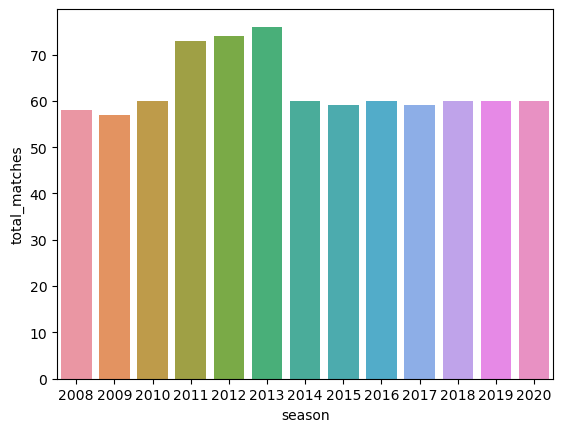

In [22]:
sns.barplot(x = 'season', y = 'total_matches', data = df_seasonwise)

## Inference:
- Histogram wont be suitable to represent this as the gaps between total matches are very low

<AxesSubplot:xlabel='season', ylabel='total_matches'>

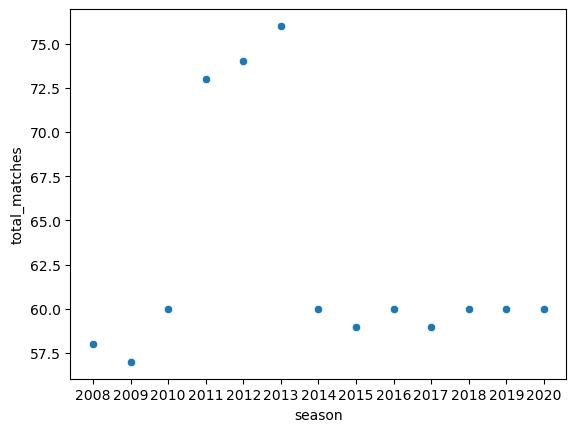

In [23]:
sns.scatterplot(x = 'season', y = 'total_matches', data = df_seasonwise)

## 2. How many runs were scored in each season?

In [24]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [25]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [26]:
df_merged = pd.merge(df_ball_by_ball, df_matches, on = 'id', how = 'inner')
df_merged

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020


## Inference:
- Total columns are now 18+18-1(as id is same in both) = 35 columns
- Since ball_by_ball df is first, rows are same as in df_ball_by_ball

In [27]:
df_seasonwise_runs = pd.DataFrame(df_merged.groupby('season')['total_runs'].sum().reset_index())
df_seasonwise_runs

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [28]:
df_seasonwise_runs.sort_values(by = 'total_runs', ascending=False)

,season,total_runs
5,2013,22541
4,2012,22453
3,2011,21154
10,2018,19901
11,2019,19400
12,2020,19352
6,2014,18909
2,2010,18864
8,2016,18862
9,2017,18769


<AxesSubplot:xlabel='season', ylabel='total_runs'>

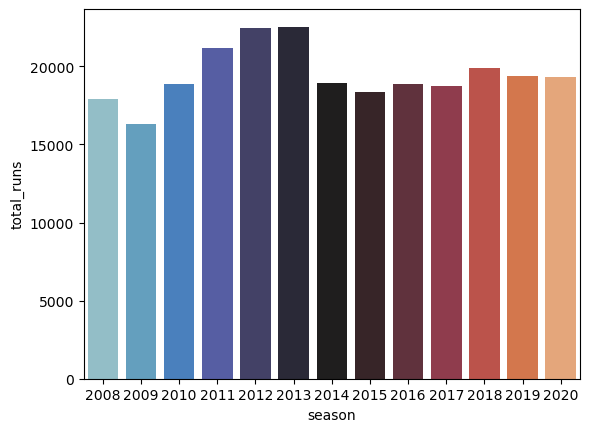

In [29]:
sns.barplot(x = 'season', y = 'total_runs', data = df_seasonwise_runs, palette='icefire')

##Inference:
- Although there are not too much differences in the total number of season, 2013 season had the most runs (22541)
- The lowest total runs were scored in 2009 season (16230)

<AxesSubplot:xlabel='total_runs', ylabel='Count'>

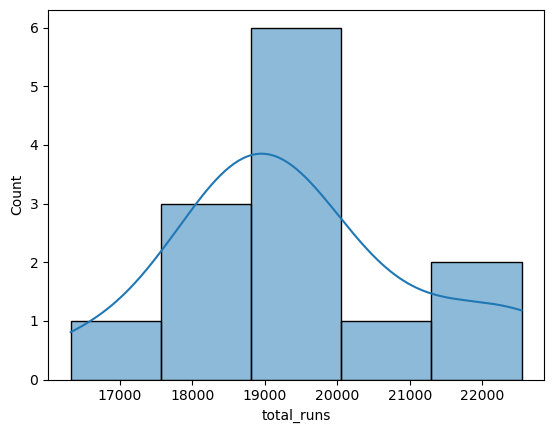

In [30]:
sns.histplot(data = df_seasonwise_runs['total_runs'], kde=True, bins=5)

## Inference:
- Most of the total runs scored in each season are between 19000-20000

## 3. What were the runs scored per match in different seasons?

In [31]:
df_seasonwise_runs

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [32]:
df_seasonwise

,season,total_matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [33]:
df_runs_per_match = pd.merge(df_seasonwise, df_seasonwise_runs, on = 'season', how = 'inner')
df_runs_per_match

,season,total_matches,total_runs
0,2008,58,17937
1,2009,57,16320
2,2010,60,18864
3,2011,73,21154
4,2012,74,22453
5,2013,76,22541
6,2014,60,18909
7,2015,59,18332
8,2016,60,18862
9,2017,59,18769


In [34]:
lst= []
for i in range(len(df_runs_per_match)):
    lst.append(df_runs_per_match['total_runs'][i] / df_runs_per_match['total_matches'][i])
    
df_runs_per_match['runs_per_match'] = lst
df_runs_per_match

,season,total_matches,total_runs,runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16320,286.315789
2,2010,60,18864,314.400000
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22541,296.592105
6,2014,60,18909,315.150000
7,2015,59,18332,310.711864
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


In [35]:
df_runs_per_match.sort_values(by = 'runs_per_match', ascending=False)

,season,total_matches,total_runs,runs_per_match
10,2018,60,19901,331.683333
11,2019,60,19400,323.333333
12,2020,60,19352,322.533333
9,2017,59,18769,318.118644
6,2014,60,18909,315.150000
2,2010,60,18864,314.400000
8,2016,60,18862,314.366667
7,2015,59,18332,310.711864
0,2008,58,17937,309.258621
4,2012,74,22453,303.418919


## Inference:
- Total runs per match was highest in the 2018 season
- Least runs per match was in 2009 season
- Total runs were the most in 2013 season but runs per match is not the highest in that season as more matches were played 

<AxesSubplot:xlabel='season', ylabel='runs_per_match'>

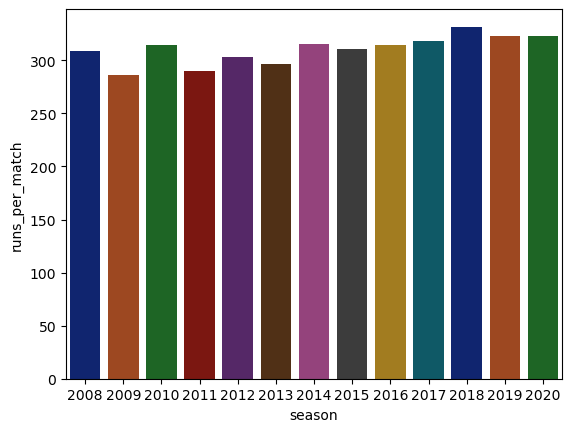

In [38]:
sns.barplot(x = 'season', y = 'runs_per_match', data = df_runs_per_match, palette='dark')

## 4. Who has umpired the most?

In [39]:
df_matches['umpire1'].unique()

array(['Asad Rauf', 'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden',
       'IL Howell', 'DJ Harper', 'RE Koertzen', 'BR Doctrove',
       'AV Jayaprakash', 'BG Jerling', 'M Erasmus', 'HDPK Dharmasena',
       'S Asnani', 'GAV Baxter', 'SS Hazare', 'K Hariharan', 'SL Shastri',
       'SK Tarapore', 'S Ravi', 'SJA Taufel', 'S Das', 'AM Saheba',
       'PR Reiffel', 'JD Cloete', 'AK Chaudhary', 'VA Kulkarni',
       'BNJ Oxenford', 'CK Nandan', 'C Shamshuddin', 'NJ Llong',
       'RK Illingworth', 'RM Deshpande', 'K Srinath', 'SD Fry',
       'CB Gaffaney', 'PG Pathak', 'Nitin Menon', 'K Bharatan',
       'AY Dandekar', 'KN Ananthapadmanabhan', 'A Nand Kishore',
       'A Deshmukh', 'YC Barde', 'RJ Tucker', 'VK Sharma', 'UV Gandhe',
       'IJ Gould'], dtype=object)

In [40]:
df_matches['umpire2'].unique()

array(['RE Koertzen', 'SL Shastri', 'GA Pratapkumar', 'DJ Harper',
       'K Hariharan', 'RB Tiffin', 'AM Saheba', 'MR Benson', 'IL Howell',
       'AV Jayaprakash', 'I Shivram', 'BR Doctrove', 'BG Jerling',
       'SJ Davis', 'SD Ranade', 'SJA Taufel', 'M Erasmus',
       'TH Wijewardene', 'SK Tarapore', 'S Ravi', 'HDPK Dharmasena',
       'SS Hazare', 'PR Reiffel', 'AL Hill', 'RJ Tucker', 'VA Kulkarni',
       'JD Cloete', 'BNJ Oxenford', 'S Asnani', 'S Das', 'C Shamshuddin',
       'AK Chaudhary', 'K Srinath', 'Subroto Das', 'CK Nandan',
       'NJ Llong', 'RK Illingworth', 'PG Pathak', 'CB Gaffaney',
       'K Srinivasan', 'SD Fry', 'VK Sharma', 'A Nand Kishore',
       'Nitin Menon', 'A Deshmukh', 'YC Barde', 'IJ Gould'], dtype=object)

## Inference:
- Wanted to check if there names are repeating in umpire 1 and 2
- As the same name is in both umpire 1 and 2, we have to consider both of them

In [41]:
df_umpire1 = pd.DataFrame(df_matches.groupby('umpire1').size().reset_index())
df_umpire1.columns = ['name', 'umpiring_as_1']
df_umpire1

,name,umpiring_as_1
0,A Deshmukh,5
1,A Nand Kishore,14
2,AK Chaudhary,56
3,AM Saheba,3
4,AV Jayaprakash,2
5,AY Dandekar,28
6,Aleem Dar,38
7,Asad Rauf,51
8,BF Bowden,37
9,BG Jerling,13


In [42]:
df_umpire2 = pd.DataFrame(df_matches.groupby('umpire2').size().reset_index())
df_umpire2.columns = ['name', 'umpiring_as_2']
df_umpire2

,name,umpiring_as_2
0,A Deshmukh,7
1,A Nand Kishore,11
2,AK Chaudhary,31
3,AL Hill,6
4,AM Saheba,23
5,AV Jayaprakash,4
6,BG Jerling,4
7,BNJ Oxenford,32
8,BR Doctrove,8
9,C Shamshuddin,60


In [43]:
df_umpire_merged = pd.merge(df_umpire1, df_umpire2, on = 'name', how = 'outer')
df_umpire_merged

,name,umpiring_as_1,umpiring_as_2
0,A Deshmukh,5.0,7.0
1,A Nand Kishore,14.0,11.0
2,AK Chaudhary,56.0,31.0
3,AM Saheba,3.0,23.0
4,AV Jayaprakash,2.0,4.0
5,AY Dandekar,28.0,NaN
6,Aleem Dar,38.0,NaN
7,Asad Rauf,51.0,NaN
8,BF Bowden,37.0,NaN
9,BG Jerling,13.0,4.0


## Why outer join?
- As all the names are not common in umpire 1 and 2, we have to take outer jin to include all the names

In [44]:
df_umpire_merged = df_umpire_merged.fillna(0.0)
df_umpire_merged

,name,umpiring_as_1,umpiring_as_2
0,A Deshmukh,5.0,7.0
1,A Nand Kishore,14.0,11.0
2,AK Chaudhary,56.0,31.0
3,AM Saheba,3.0,23.0
4,AV Jayaprakash,2.0,4.0
5,AY Dandekar,28.0,0.0
6,Aleem Dar,38.0,0.0
7,Asad Rauf,51.0,0.0
8,BF Bowden,37.0,0.0
9,BG Jerling,13.0,4.0


In [45]:
total_ump = []
for i in range(len(df_umpire_merged)):
    total_ump.append(df_umpire_merged['umpiring_as_1'][i] + df_umpire_merged['umpiring_as_2'][i])
df_umpire_merged['total_umpiring'] = total_ump
df_umpire_merged

,name,umpiring_as_1,umpiring_as_2,total_umpiring
0,A Deshmukh,5.0,7.0,12.0
1,A Nand Kishore,14.0,11.0,25.0
2,AK Chaudhary,56.0,31.0,87.0
3,AM Saheba,3.0,23.0,26.0
4,AV Jayaprakash,2.0,4.0,6.0
5,AY Dandekar,28.0,0.0,28.0
6,Aleem Dar,38.0,0.0,38.0
7,Asad Rauf,51.0,0.0,51.0
8,BF Bowden,37.0,0.0,37.0
9,BG Jerling,13.0,4.0,17.0


In [46]:
df_umpire_merged.sort_values(by = 'total_umpiring', ascending = False).head()

,name,umpiring_as_1,umpiring_as_2,total_umpiring
37,S Ravi,37.0,84.0,121.0
17,HDPK Dharmasena,78.0,16.0,94.0
2,AK Chaudhary,56.0,31.0,87.0
12,C Shamshuddin,22.0,60.0,82.0
25,M Erasmus,40.0,25.0,65.0


## Inference:
- The above are the top 5 umpires who have umpired in the most number of matches
- The top umpire is S Ravi with total 121 matches umpired

<AxesSubplot:xlabel='total_umpiring', ylabel='Count'>

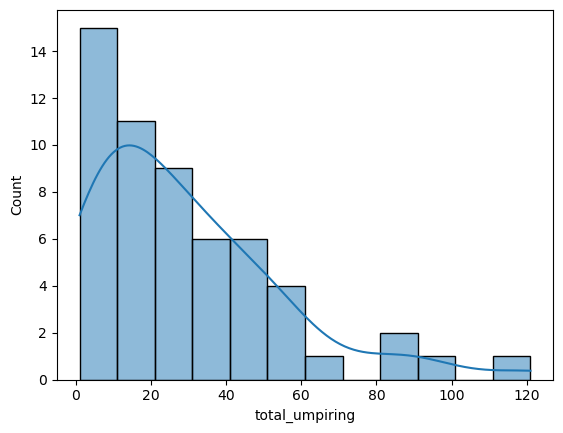

In [47]:
sns.histplot(data = df_umpire_merged['total_umpiring'], kde = True, bins = 12)

## Inference:
- Most umpires have umpired 1-10 matches only

## 5. Which team has won the most tosses?

In [48]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [49]:
df_matches.groupby('toss_winner').size()

toss_winner
Chennai Super Kings             97
Deccan Chargers                 43
Delhi Capitals                  20
Delhi Daredevils                80
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   20
Rajasthan Royals                87
Rising Pune Supergiant           6
Rising Pune Supergiants          7
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
dtype: int64

In [50]:
df_toss_winner = pd.DataFrame(df_matches.groupby('toss_winner').size().reset_index())
df_toss_winner.columns = ['toss_winner', 'times_toss_won']
df_toss_winner.sort_values(by = 'times_toss_won', ascending=False).head(1)

,toss_winner,times_toss_won
8,Mumbai Indians,106


## Inference:
- Mumbai Indians have won the most amount of tosses

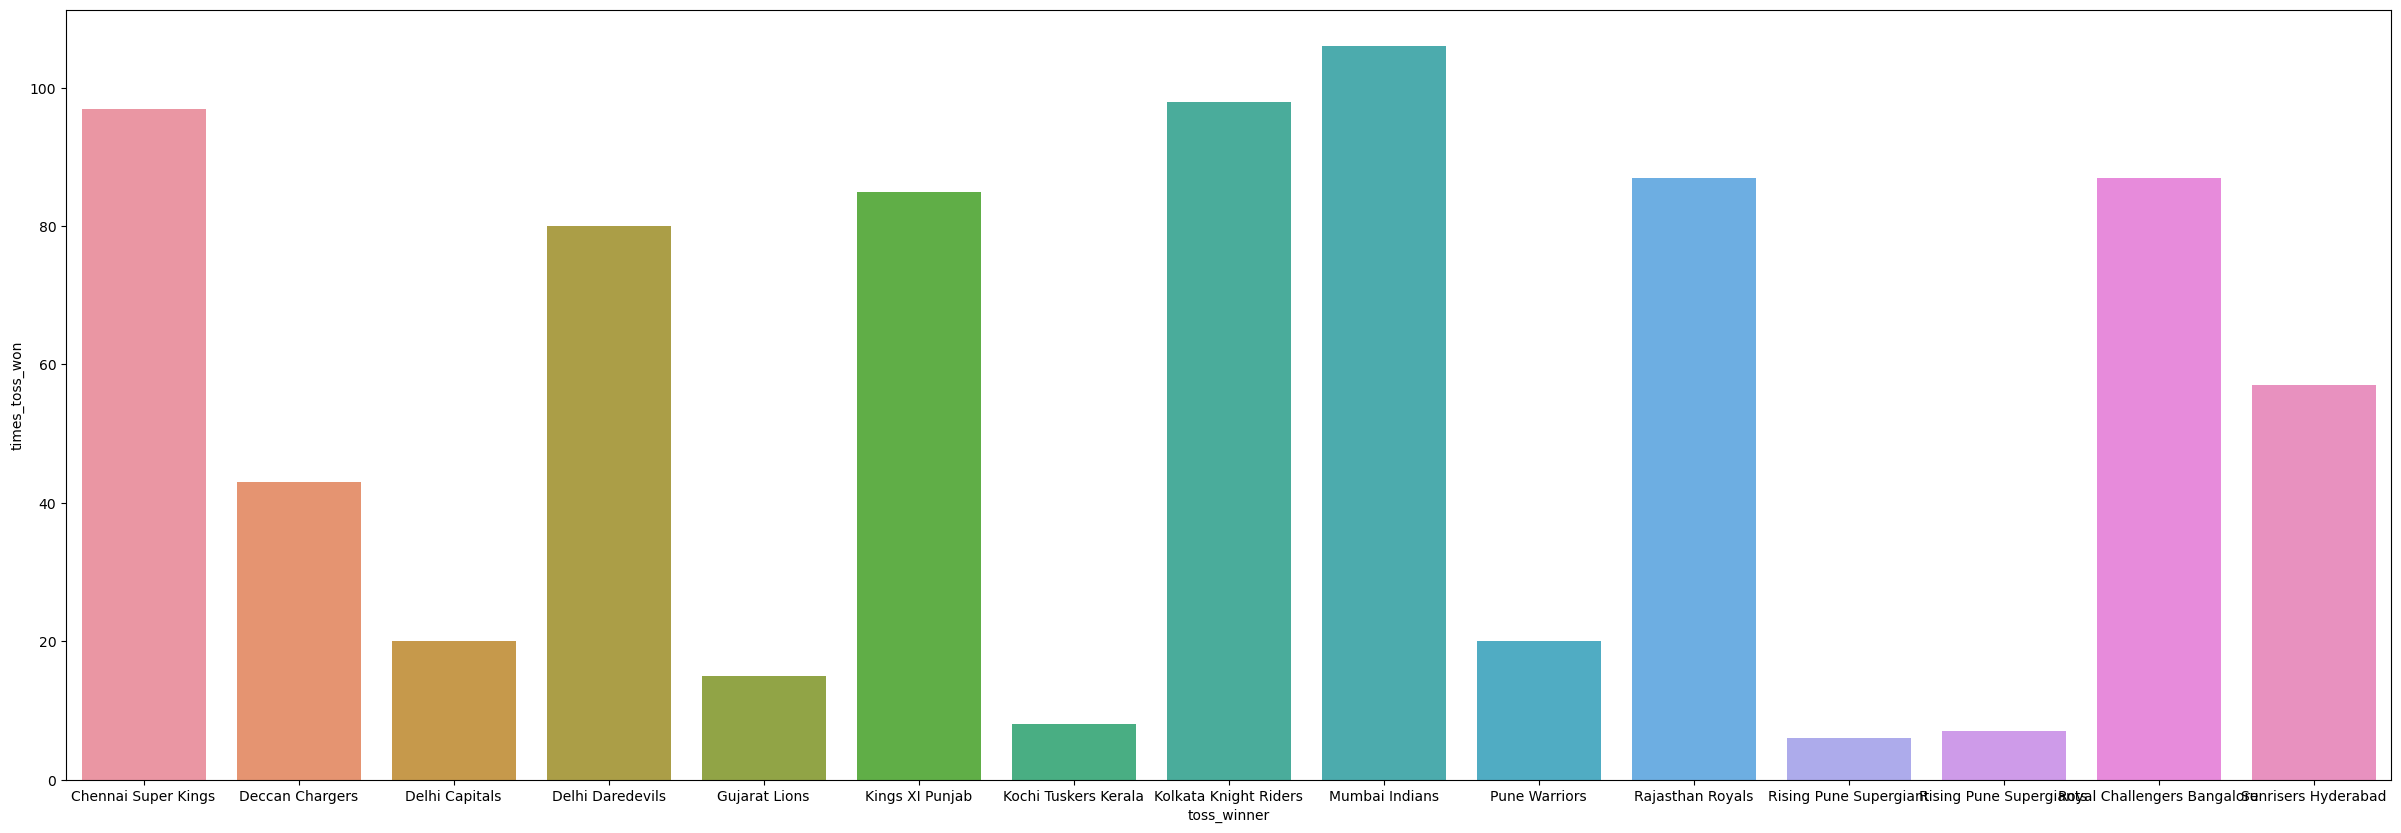

In [51]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'toss_winner', y = 'times_toss_won', data = df_toss_winner)
plt.show()

## 6. What does the team decide after winning the toss?

In [52]:
df_matches.groupby('toss_decision').size()

toss_decision
bat      320
field    496
dtype: int64

## Insight:
- Since the data is less, let us not make it into a df
- We will simple make a list of it

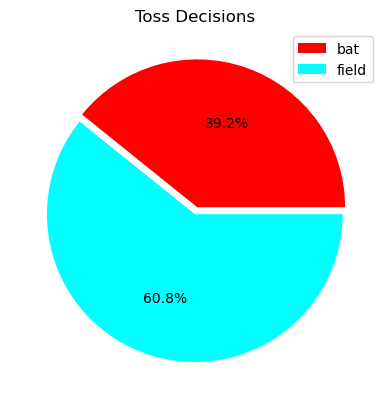

In [53]:
dec = ['bat', 'field']
freq = [320, 496]

plt.pie(freq, autopct='%1.1f%%', explode = [0.05, 0], colors=['red', 'cyan'])
plt.title('Toss Decisions')
plt.legend(dec)
plt.show()

## Inference:
- We can infer from the above that 60% of the times, teams chose to field first if they won the toss

## 7. How does the toss decision vary across seasons?

In [54]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [55]:
df_matches.groupby(['season', 'toss_decision']).size()

season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
dtype: int64

In [56]:
df_dec_seasonwise = pd.DataFrame(df_matches.groupby(['season', 'toss_decision']).size().unstack().reset_index())
df_dec_seasonwise.columns = ['season', 'bat', 'field']
df_dec_seasonwise

,season,bat,field
0,2008,26,32
1,2009,35,22
2,2010,39,21
3,2011,25,48
4,2012,37,37
5,2013,45,31
6,2014,19,41
7,2015,25,34
8,2016,11,49
9,2017,11,48


## Info on .unstack():
- If we have used groupby on 2 or more columns then it is very useful to convert that into a data frame

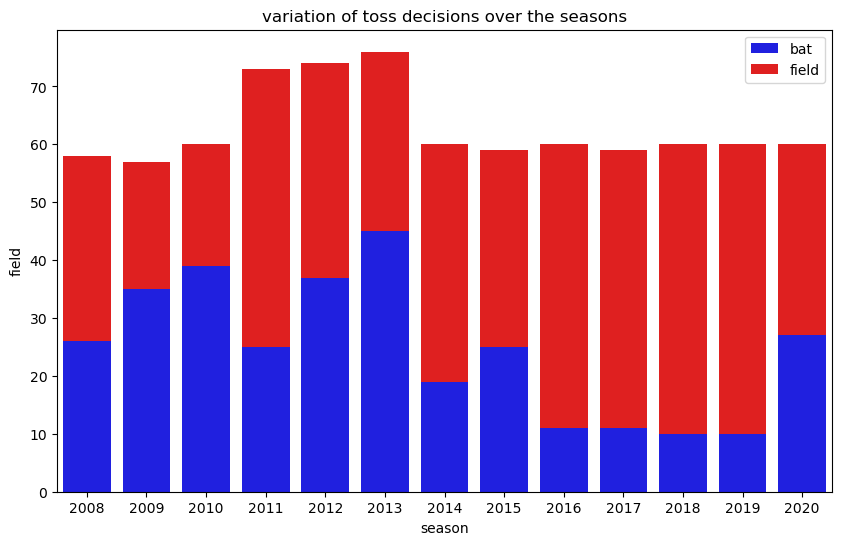

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'season', y = 'bat', data = df_dec_seasonwise, label = 'bat', color = 'blue')
sns.barplot(x = 'season', y = 'field', data = df_dec_seasonwise, label = 'field', color = 'red', bottom = list(df_dec_seasonwise['bat']))
plt.legend()
plt.title('variation of toss decisions over the seasons')
plt.show()

## Inference
- We can observe that before 2014, batting was chosen significantly more than fielding when the toss was won by a team
- But from 2014, the strategy seems to have been changed. Now teams are preferring to chose fielding if a toss is won.

## 8. Does winning the toss imply winning the game?

In [58]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [59]:
df_matches.groupby('toss_winner').size()

toss_winner
Chennai Super Kings             97
Deccan Chargers                 43
Delhi Capitals                  20
Delhi Daredevils                80
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   20
Rajasthan Royals                87
Rising Pune Supergiant           6
Rising Pune Supergiants          7
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
dtype: int64

In [60]:
df_matches.groupby('winner').size()

winner
Chennai Super Kings            106
Deccan Chargers                 29
Delhi Capitals                  19
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders           99
Mumbai Indians                 120
Pune Warriors                   12
Rajasthan Royals                81
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     91
Sunrisers Hyderabad             66
dtype: int64

In [69]:
lst_chk = []
for name in df_matches['team1'].unique():
    toss_won = 0
    match_won = 0
    for i in df_matches.values:
        if i[8] == name:
            toss_won += 1
            if i[10] == name:
                match_won += 1
    lst_chk.append([name, toss_won, match_won])
            
lst_chk

[['Royal Challengers Bangalore', 87, 43],
 ['Kings XI Punjab', 85, 36],
 ['Delhi Daredevils', 80, 35],
 ['Mumbai Indians', 106, 61],
 ['Kolkata Knight Riders', 98, 55],
 ['Rajasthan Royals', 87, 44],
 ['Deccan Chargers', 43, 19],
 ['Chennai Super Kings', 97, 61],
 ['Kochi Tuskers Kerala', 8, 4],
 ['Pune Warriors', 20, 3],
 ['Sunrisers Hyderabad', 57, 29],
 ['Gujarat Lions', 15, 10],
 ['Rising Pune Supergiant', 6, 5],
 ['Delhi Capitals', 20, 10]]

In [71]:
df_winning_implies_won = pd.DataFrame(lst_chk)
df_winning_implies_won.columns = ['team', 'toss_won', 'matches_won_when_toss_won']
df_winning_implies_won

,team,toss_won,matches_won_when_toss_won
0,Royal Challengers Bangalore,87,43
1,Kings XI Punjab,85,36
2,Delhi Daredevils,80,35
3,Mumbai Indians,106,61
4,Kolkata Knight Riders,98,55
5,Rajasthan Royals,87,44
6,Deccan Chargers,43,19
7,Chennai Super Kings,97,61
8,Kochi Tuskers Kerala,8,4
9,Pune Warriors,20,3


In [76]:
lst = []
for i in range(len(df_winning_implies_won)):
    lst.append(round((df_winning_implies_won['matches_won_when_toss_won'][i] / df_winning_implies_won['toss_won'][i]) * 100, 2))
    
lst

[49.43,
 42.35,
 43.75,
 57.55,
 56.12,
 50.57,
 44.19,
 62.89,
 50.0,
 15.0,
 50.88,
 66.67,
 83.33,
 50.0]

In [77]:
df_winning_implies_won['percentage%'] = lst
df_winning_implies_won

,team,toss_won,matches_won_when_toss_won,percentage%
0,Royal Challengers Bangalore,87,43,49.43
1,Kings XI Punjab,85,36,42.35
2,Delhi Daredevils,80,35,43.75
3,Mumbai Indians,106,61,57.55
4,Kolkata Knight Riders,98,55,56.12
5,Rajasthan Royals,87,44,50.57
6,Deccan Chargers,43,19,44.19
7,Chennai Super Kings,97,61,62.89
8,Kochi Tuskers Kerala,8,4,50.00
9,Pune Warriors,20,3,15.00


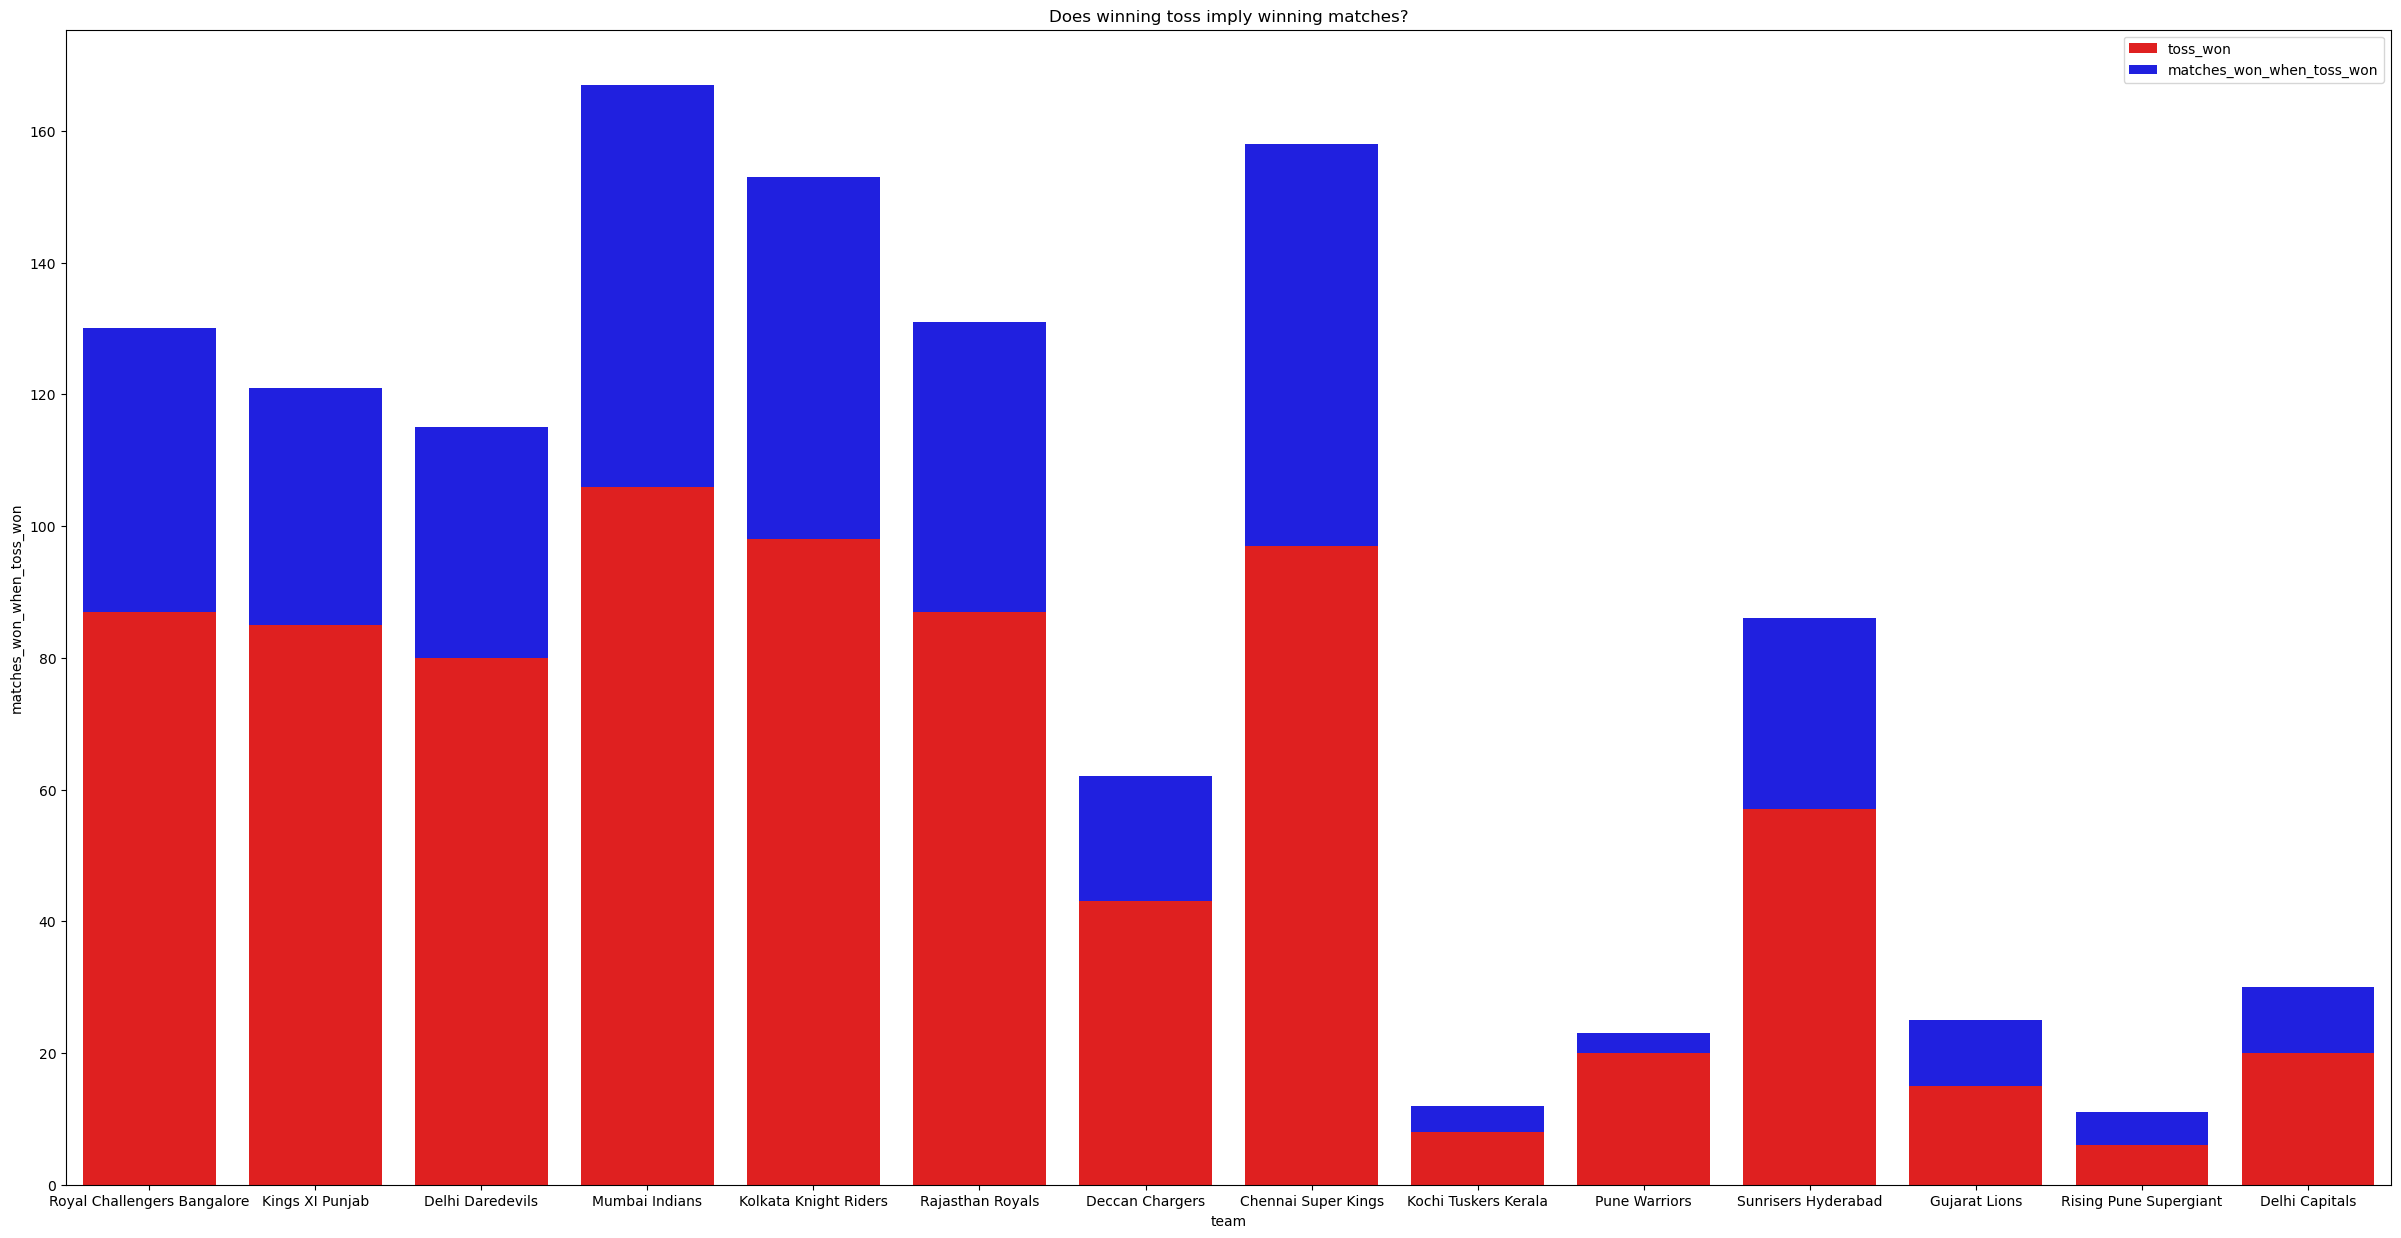

In [87]:
plt.figure(figsize=(30,15))
sns.barplot(x = 'team', y = 'toss_won', data = df_winning_implies_won, label = 'toss_won', color = 'red')
sns.barplot(x = 'team', y = 'matches_won_when_toss_won', data = df_winning_implies_won, bottom = list(df_winning_implies_won['toss_won']), label = 'matches_won_when_toss_won', color = 'blue')
plt.title('Does winning toss imply winning matches?')
plt.legend()
plt.show()

## Inference:
- It cannot be concluded that winning a toss implies winning a match as no team has won the game 100% of the times after winning the toss

In [88]:
df_winning_implies_won['percentage%'].mean()

51.62357142857143

## Inference:
- On an average, only 50% of the times teams that have won the toss also won the match
- Hence there is approx a 50% chance of winning the match if toss is won

<AxesSubplot:xlabel='percentage%', ylabel='Count'>

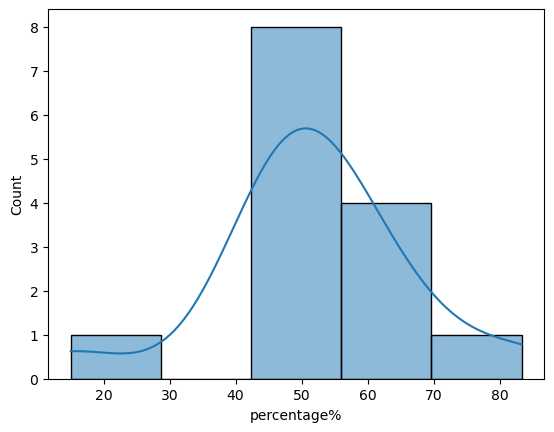

In [90]:
sns.histplot(data = df_winning_implies_won['percentage%'], kde = True, bins = 5)

## Inference:
- Most teams have won the matches 50% of the times they have won the toss

## 9. How many times has the chasing team won the match?

In [91]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [98]:
df_matches[df_matches['result'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,2011
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,2015
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,2019


## Inference:
- Since in these records, the winner , result and result margin is NaN, it is safe to conclude that these were either cancelled or postponed and can thus be neglected.

In [102]:
df_matches.groupby('result').size().reset_index(name = 'freq')

,result,freq
0,runs,364
1,tie,13
2,wickets,435


In [101]:
df_result = pd.DataFrame(df_matches.groupby('result').size().reset_index())
df_result.columns = ['won_by', 'freq']
df_result

,won_by,freq
0,runs,364
1,tie,13
2,wickets,435


In [106]:
lst_res = []
for i in range(3):
    lst_res.append(round(df_result['freq'][i] / sum(df_result['freq']) *100, 2))
    
df_result['percentage%'] = lst_res
df_result

,won_by,freq,percentage%
0,runs,364,44.83
1,tie,13,1.60
2,wickets,435,53.57


## Inference:
- We can see that if a team has won a match by wickets, they were the chasing side
- According to the above results, the chasing side has won the match 53.57% of the times
- This means that the chasing teams are slighy more likely to win the match

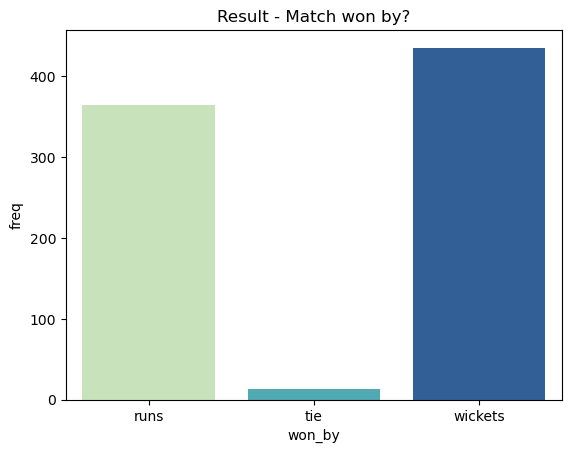

In [114]:
sns.barplot(x = 'won_by', y = 'freq', data = df_result, palette='YlGnBu')
plt.title('Result - Match won by?')
plt.show()

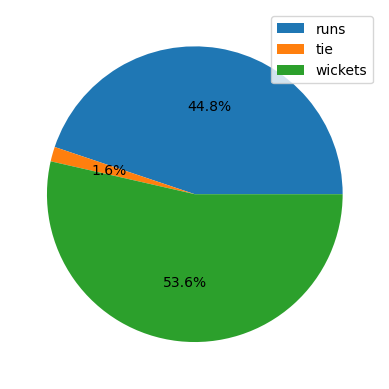

In [110]:
plt.pie(list(df_result['freq']), autopct='%1.1f%%')
plt.legend(['runs', 'tie', 'wickets'])
plt.show()

## 10. Which all teams had won this tournament?

In [115]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [116]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


## What we will do -
- Since all the info about play offs and semi final, final is not there, we will assume that the more number of matches a team has won, the better are its chances at winning the tournament
- Hence the team with the highest number of wins in a season can be declared as the winner

In [120]:
df_most_wins = df_matches.groupby(['season', 'winner']).size().reset_index(name = 'matches_won')
df_most_wins

,season,winner,matches_won
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
103,2020,Kolkata Knight Riders,7
104,2020,Mumbai Indians,11
105,2020,Rajasthan Royals,6
106,2020,Royal Challengers Bangalore,7


In [123]:
df_most_wins.groupby('season')[['winner', 'matches_won']].max().reset_index()

,season,winner,matches_won
0,2008,Royal Challengers Bangalore,13
1,2009,Royal Challengers Bangalore,10
2,2010,Royal Challengers Bangalore,11
3,2011,Royal Challengers Bangalore,11
4,2012,Royal Challengers Bangalore,12
5,2013,Sunrisers Hyderabad,13
6,2014,Sunrisers Hyderabad,12
7,2015,Sunrisers Hyderabad,10
8,2016,Sunrisers Hyderabad,11
9,2017,Sunrisers Hyderabad,12


## Inference:
- As we can see, in each season only RCB and SRH have won the most matches
- Using our assumptions we can conclude that only RCB and SRH have won the IPL tournaments

## 11. Which team has played the most number of matches?

In [124]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [127]:
df_matches.groupby('team1').size()

team1
Chennai Super Kings             94
Deccan Chargers                 39
Delhi Capitals                  19
Delhi Daredevils                83
Gujarat Lions                   16
Kings XI Punjab                 92
Kochi Tuskers Kerala             7
Kolkata Knight Riders           95
Mumbai Indians                  97
Pune Warriors                   23
Rajasthan Royals                70
Rising Pune Supergiant          14
Royal Challengers Bangalore    108
Sunrisers Hyderabad             59
dtype: int64

In [128]:
df_matches.groupby('team2').size()

team2
Chennai Super Kings             84
Deccan Chargers                 36
Delhi Capitals                  14
Delhi Daredevils                78
Gujarat Lions                   14
Kings XI Punjab                 98
Kochi Tuskers Kerala             7
Kolkata Knight Riders           97
Mumbai Indians                 106
Pune Warriors                   23
Rajasthan Royals                91
Rising Pune Supergiant          16
Royal Challengers Bangalore     87
Sunrisers Hyderabad             65
dtype: int64

In [133]:
merged_teams = pd.concat([df_matches['team1'], df_matches['team2']])
df_total_matches_played = merged_teams.value_counts().reset_index()
df_total_matches_played.columns = ['team', 'total_matches_played']
df_total_matches_played

,team,total_matches_played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


## Inference:
- Throughout all seeasons, Mumbai Indians have played the maximum number of matches (203)

## Insight (.concat() and .value_counts()):
- Previously in the same type of question, .groupby() was used and then summation of two columns
- In these questions, .concat() merges the values of two solumns into a series and value_counts() counts the freq of each value
- This is a better approach

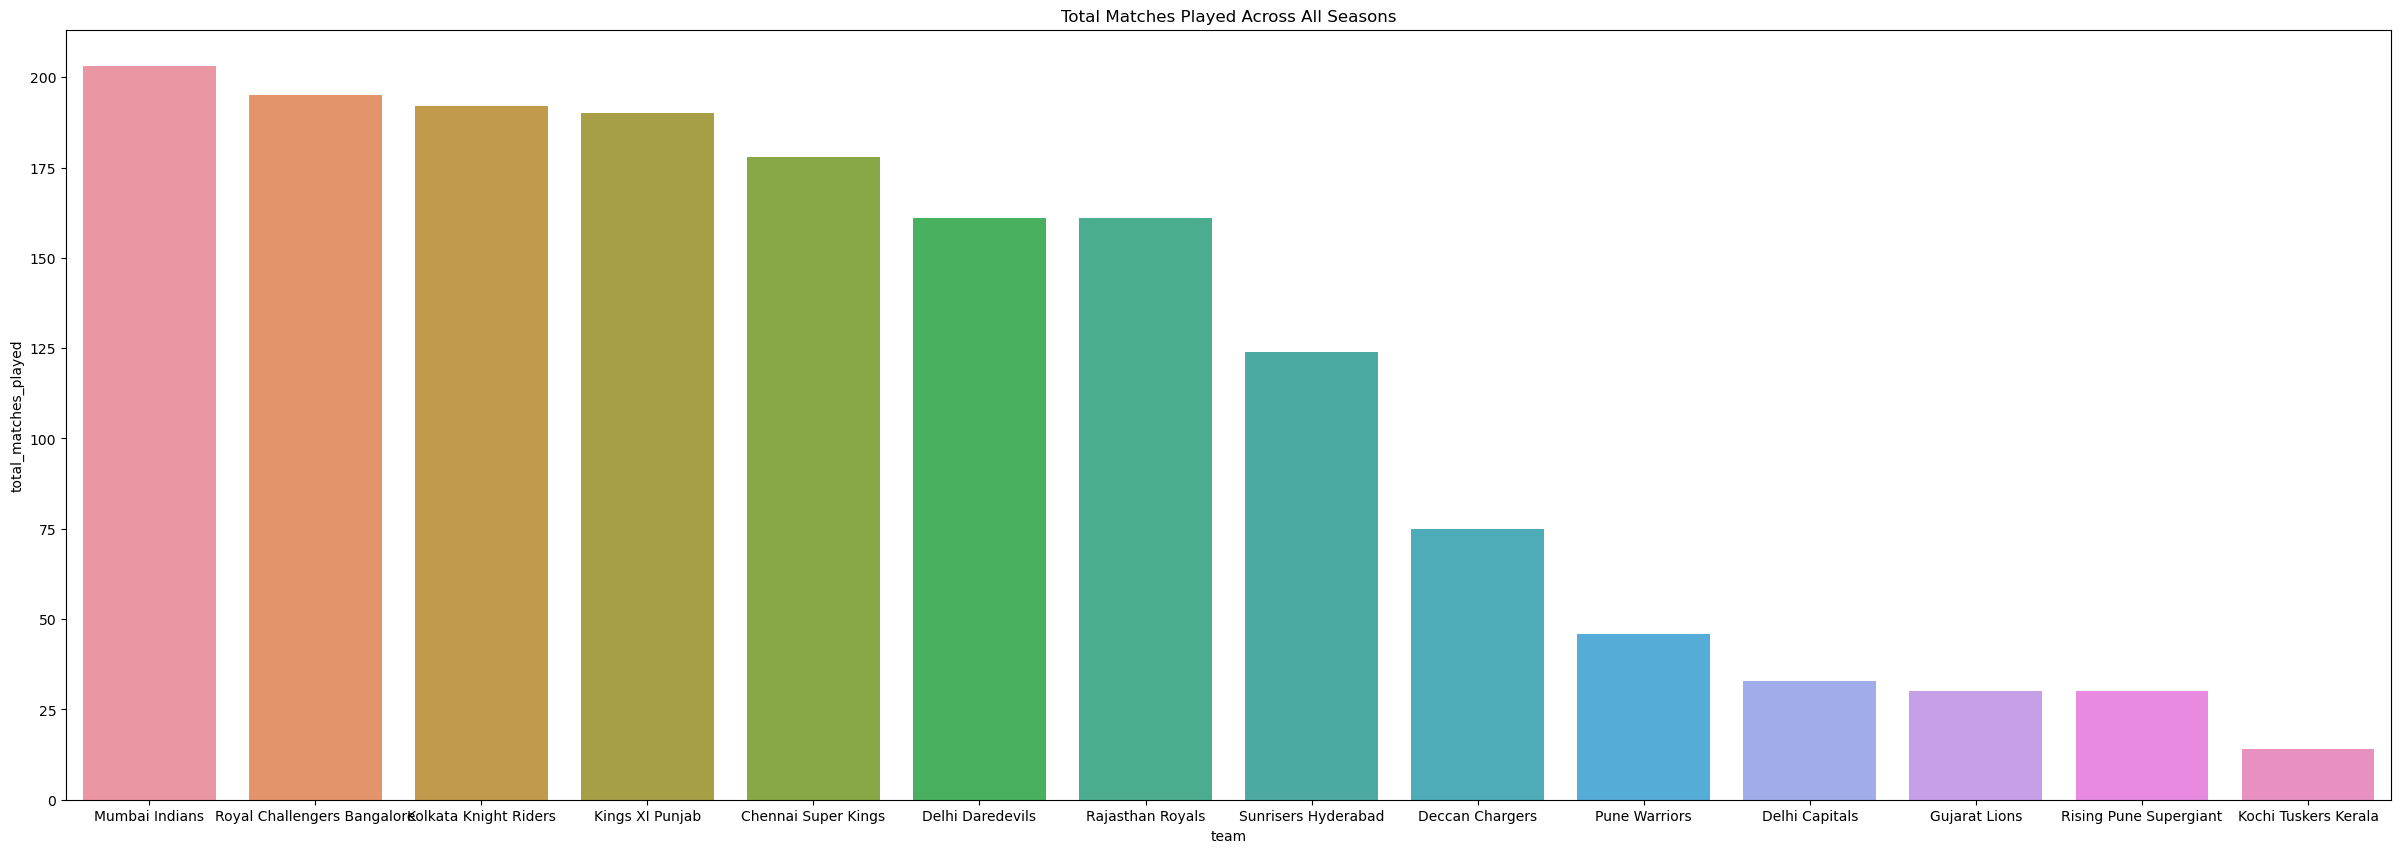

In [135]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'team', y = 'total_matches_played', data = df_total_matches_played)
plt.title('Total Matches Played Across All Seasons')
plt.show()

## 12. Which team has won the most number of times?

In [149]:
df_matches_won = df_matches.groupby('winner').size().reset_index(name = 'matches_won').sort_values(by = 'matches_won', ascending=False)
df_matches_won.columns = ['team', 'matches_won']
df_matches_won

,team,matches_won
8,Mumbai Indians,120
0,Chennai Super Kings,106
7,Kolkata Knight Riders,99
13,Royal Challengers Bangalore,91
5,Kings XI Punjab,88
10,Rajasthan Royals,81
3,Delhi Daredevils,67
14,Sunrisers Hyderabad,66
1,Deccan Chargers,29
2,Delhi Capitals,19


## Inference:
- Across all seasons, Mumbai Indians have won the most number of times (120)

## 13. Which team has the highest winning percentage?

In [142]:
df_total_matches_played

,team,total_matches_played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [150]:
df_matches_won

,team,matches_won
8,Mumbai Indians,120
0,Chennai Super Kings,106
7,Kolkata Knight Riders,99
13,Royal Challengers Bangalore,91
5,Kings XI Punjab,88
10,Rajasthan Royals,81
3,Delhi Daredevils,67
14,Sunrisers Hyderabad,66
1,Deccan Chargers,29
2,Delhi Capitals,19


In [152]:
df_win_percentage = pd.merge(df_total_matches_played, df_matches_won, on = 'team', how = 'inner')
df_win_percentage

,team,total_matches_played,matches_won
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,91
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,88
4,Chennai Super Kings,178,106
5,Delhi Daredevils,161,67
6,Rajasthan Royals,161,81
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [155]:
df_win_percentage['win_percentage_%'] = round(df_win_percentage['matches_won'] / df_win_percentage['total_matches_played'] * 100, 2)
df_win_percentage

,team,total_matches_played,matches_won,win_percentage_%
0,Mumbai Indians,203,120,59.11
1,Royal Challengers Bangalore,195,91,46.67
2,Kolkata Knight Riders,192,99,51.56
3,Kings XI Punjab,190,88,46.32
4,Chennai Super Kings,178,106,59.55
5,Delhi Daredevils,161,67,41.61
6,Rajasthan Royals,161,81,50.31
7,Sunrisers Hyderabad,124,66,53.23
8,Deccan Chargers,75,29,38.67
9,Pune Warriors,46,12,26.09


In [156]:
df_win_percentage.sort_values(by = 'win_percentage_%', ascending=False)

,team,total_matches_played,matches_won,win_percentage_%
4,Chennai Super Kings,178,106,59.55
0,Mumbai Indians,203,120,59.11
10,Delhi Capitals,33,19,57.58
7,Sunrisers Hyderabad,124,66,53.23
2,Kolkata Knight Riders,192,99,51.56
6,Rajasthan Royals,161,81,50.31
1,Royal Challengers Bangalore,195,91,46.67
3,Kings XI Punjab,190,88,46.32
11,Gujarat Lions,30,13,43.33
13,Kochi Tuskers Kerala,14,6,42.86


## Inference:
- CSK has the highest win percentage of 59.55%

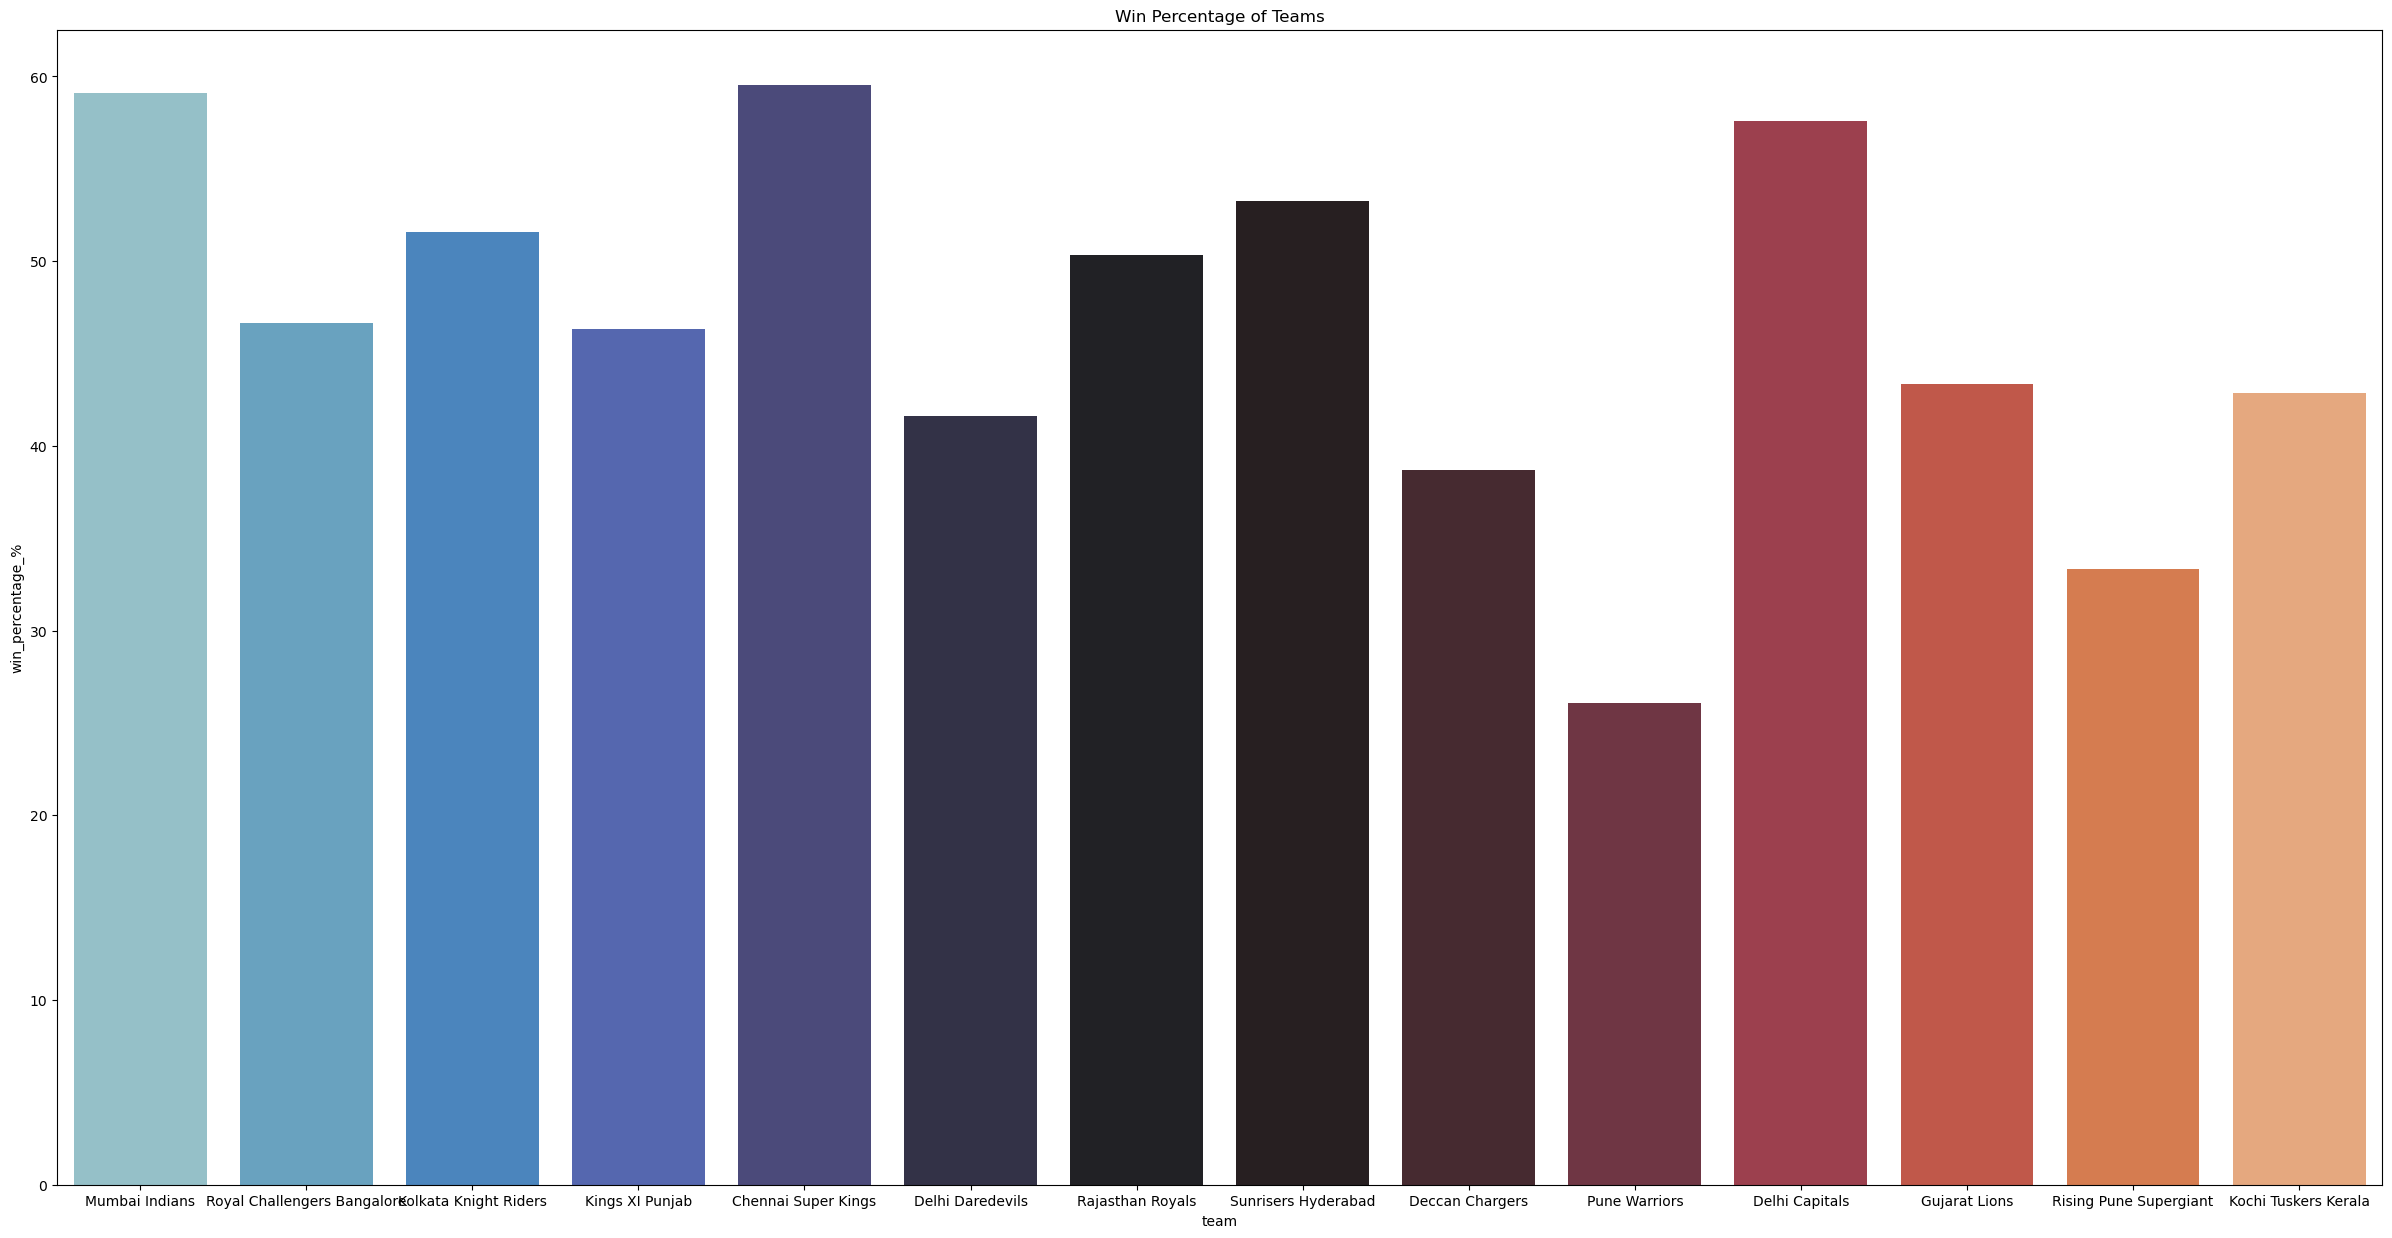

In [165]:
plt.figure(figsize=(30,15))
sns.barplot(x = 'team', y = 'win_percentage_%', data = df_win_percentage, palette='icefire')
plt.title('Win Percentage of Teams')
plt.show()

## 14. Is there any lucky venue for a particular team?

In [166]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [201]:
x = df_matches.groupby(['team1', 'venue']).size().reset_index(name = 'matches_played_as_1')
x.columns = ['team', 'venue', 'matches_played_as_1']
x

,team,venue,matches_played_as_1
0,Chennai Super Kings,Brabourne Stadium,1
1,Chennai Super Kings,Buffalo Park,1
2,Chennai Super Kings,De Beers Diamond Oval,1
3,Chennai Super Kings,Dr DY Patil Sports Academy,3
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1
...,...,...,...
120,Sunrisers Hyderabad,M Chinnaswamy Stadium,1
121,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",44
122,Sunrisers Hyderabad,Sharjah Cricket Stadium,1
123,Sunrisers Hyderabad,Sheikh Zayed Stadium,3


In [202]:
y = df_matches.groupby(['team2', 'venue']).size().reset_index(name = 'matches_played_as_2')
y.columns = ['team', 'venue', 'matches_played_as_2']
y

,team,venue,matches_played_as_2
0,Chennai Super Kings,Barabati Stadium,1
1,Chennai Super Kings,Brabourne Stadium,1
2,Chennai Super Kings,Dr DY Patil Sports Academy,1
3,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1
4,Chennai Super Kings,Dubai International Cricket Stadium,7
...,...,...,...
265,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,2
266,Sunrisers Hyderabad,Sharjah Cricket Stadium,4
267,Sunrisers Hyderabad,Sheikh Zayed Stadium,3
268,Sunrisers Hyderabad,Subrata Roy Sahara Stadium,1


In [203]:
z = pd.merge(x, y, on = ['team', 'venue'], how = 'outer')
z = z.fillna(0.0)
z

,team,venue,matches_played_as_1,matches_played_as_2
0,Chennai Super Kings,Brabourne Stadium,1.0,1.0
1,Chennai Super Kings,Buffalo Park,1.0,0.0
2,Chennai Super Kings,De Beers Diamond Oval,1.0,0.0
3,Chennai Super Kings,Dr DY Patil Sports Academy,3.0,1.0
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1.0,1.0
...,...,...,...,...
308,Sunrisers Hyderabad,"Sardar Patel Stadium, Motera",0.0,1.0
309,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,0.0,1.0
310,Sunrisers Hyderabad,Sawai Mansingh Stadium,0.0,3.0
311,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,0.0,2.0


In [204]:
z['total_matches_played'] = z['matches_played_as_1'] + z['matches_played_as_2']
z

,team,venue,matches_played_as_1,matches_played_as_2,total_matches_played
0,Chennai Super Kings,Brabourne Stadium,1.0,1.0,2.0
1,Chennai Super Kings,Buffalo Park,1.0,0.0,1.0
2,Chennai Super Kings,De Beers Diamond Oval,1.0,0.0,1.0
3,Chennai Super Kings,Dr DY Patil Sports Academy,3.0,1.0,4.0
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1.0,1.0,2.0
...,...,...,...,...,...
308,Sunrisers Hyderabad,"Sardar Patel Stadium, Motera",0.0,1.0,1.0
309,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,0.0,1.0,1.0
310,Sunrisers Hyderabad,Sawai Mansingh Stadium,0.0,3.0,3.0
311,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,0.0,2.0,2.0


## What did we do?
- Since the dataset had team1 and team2, we had to count for both columns and then add them to find actual number of total matches played in a stadium

In [209]:
w = df_matches.groupby(['winner', 'venue']).size().reset_index(name = 'times_won_in_stadium')
w.columns = ['team', 'venue', 'times_won_in_stadium']
w

,team,venue,times_won_in_stadium
0,Chennai Super Kings,Brabourne Stadium,1
1,Chennai Super Kings,Buffalo Park,1
2,Chennai Super Kings,De Beers Diamond Oval,1
3,Chennai Super Kings,Dr DY Patil Sports Academy,3
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2
...,...,...,...
244,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,1
245,Sunrisers Hyderabad,Sharjah Cricket Stadium,2
246,Sunrisers Hyderabad,Sheikh Zayed Stadium,2
247,Sunrisers Hyderabad,Subrata Roy Sahara Stadium,1


In [213]:
v = pd.merge(z, w, on = ['team', 'venue'], how = 'inner')
v

,team,venue,matches_played_as_1,matches_played_as_2,total_matches_played,times_won_in_stadium
0,Chennai Super Kings,Brabourne Stadium,1.0,1.0,2.0,1
1,Chennai Super Kings,Buffalo Park,1.0,0.0,1.0,1
2,Chennai Super Kings,De Beers Diamond Oval,1.0,0.0,1.0,1
3,Chennai Super Kings,Dr DY Patil Sports Academy,3.0,1.0,4.0,3
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1.0,1.0,2.0,2
...,...,...,...,...,...,...
240,Sunrisers Hyderabad,"Sardar Patel Stadium, Motera",0.0,1.0,1.0,1
241,Sunrisers Hyderabad,Saurashtra Cricket Association Stadium,0.0,1.0,1.0,1
242,Sunrisers Hyderabad,Sawai Mansingh Stadium,0.0,3.0,3.0,1
243,Sunrisers Hyderabad,Shaheed Veer Narayan Singh International Stadium,0.0,2.0,2.0,1


In [214]:
u = v[v['total_matches_played'] == v['times_won_in_stadium']]
u

,team,venue,matches_played_as_1,matches_played_as_2,total_matches_played,times_won_in_stadium
1,Chennai Super Kings,Buffalo Park,1.0,0.0,1.0,1
2,Chennai Super Kings,De Beers Diamond Oval,1.0,0.0,1.0,1
4,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,1.0,1.0,2.0,2
16,Chennai Super Kings,St George's Park,1.0,1.0,2.0,2
24,Deccan Chargers,Newlands,1.0,1.0,2.0,2
31,Delhi Capitals,Sharjah Cricket Stadium,2.0,1.0,3.0,3
33,Delhi Daredevils,Buffalo Park,1.0,0.0,1.0,1
35,Delhi Daredevils,Kingsmead,1.0,2.0,3.0,3
38,Delhi Daredevils,Newlands,1.0,0.0,1.0,1
60,Kings XI Punjab,St George's Park,1.0,0.0,1.0,1


In [215]:
u.groupby('team').size().reset_index(name = 'no_of_lucky_stadiums')

,team,no_of_lucky_stadiums
0,Chennai Super Kings,4
1,Deccan Chargers,4
2,Delhi Capitals,6
3,Delhi Daredevils,7
4,Gujarat Lions,2
5,Kings XI Punjab,6
6,Kochi Tuskers Kerala,3
7,Kolkata Knight Riders,7
8,Mumbai Indians,4
9,Pune Warriors,1


## What did we do?
- We found out the 100% win rate (if any) of the teams
- Lucky stadiums or venues are those where win rate is 100%

## Inference:
- Above are the teams and their lucky stadiums as they have 100% win rate in those particular stadiums

## 15. Innings wise comparison between teams

In [216]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [221]:
df_innings_wise_runs = df_ball_by_ball.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack().reset_index()
df_innings_wise_runs.columns = ['team', 'runs_in_inning_1', 'runs_in_inning_2']
df_innings_wise_runs

,team,runs_in_inning_1,runs_in_inning_2
0,Chennai Super Kings,15344,13019
1,Deccan Chargers,6765,4698
2,Delhi Capitals,2860,2436
3,Delhi Daredevils,11247,13038
4,Gujarat Lions,2267,2589
5,Kings XI Punjab,15710,14307
6,Kochi Tuskers Kerala,1009,892
7,Kolkata Knight Riders,14842,14541
8,Mumbai Indians,18338,13948
9,Pune Warriors,2973,3385


In [243]:
lst = []
for i in range(len(df_innings_wise_runs)):
    if df_innings_wise_runs['runs_in_inning_1'][i] > df_innings_wise_runs['runs_in_inning_2'][i] :
        lst.append('1')
    else:
        lst.append('2')
df_innings_wise_runs['more_runs_in_inning'] = lst
df_innings_wise_runs

,team,runs_in_inning_1,runs_in_inning_2,more_runs_in_inning
0,Chennai Super Kings,15344,13019,1
1,Deccan Chargers,6765,4698,1
2,Delhi Capitals,2860,2436,1
3,Delhi Daredevils,11247,13038,2
4,Gujarat Lions,2267,2589,2
5,Kings XI Punjab,15710,14307,1
6,Kochi Tuskers Kerala,1009,892,1
7,Kolkata Knight Riders,14842,14541,1
8,Mumbai Indians,18338,13948,1
9,Pune Warriors,2973,3385,2


In [244]:
df_innings_wise_runs.groupby('more_runs_in_inning').size()

more_runs_in_inning
1    11
2     4
dtype: int64

## Inference:
- Out of 15 teams, 11 teams have total runs more in inning 1 than in inning 2
- Hence, according to the anaysis, teams which bat in first innings are likely to score more runs than if they were to bat in second inning

## What did we do:
- For each team, we found out how many total runs they scored when batting in first and second innings

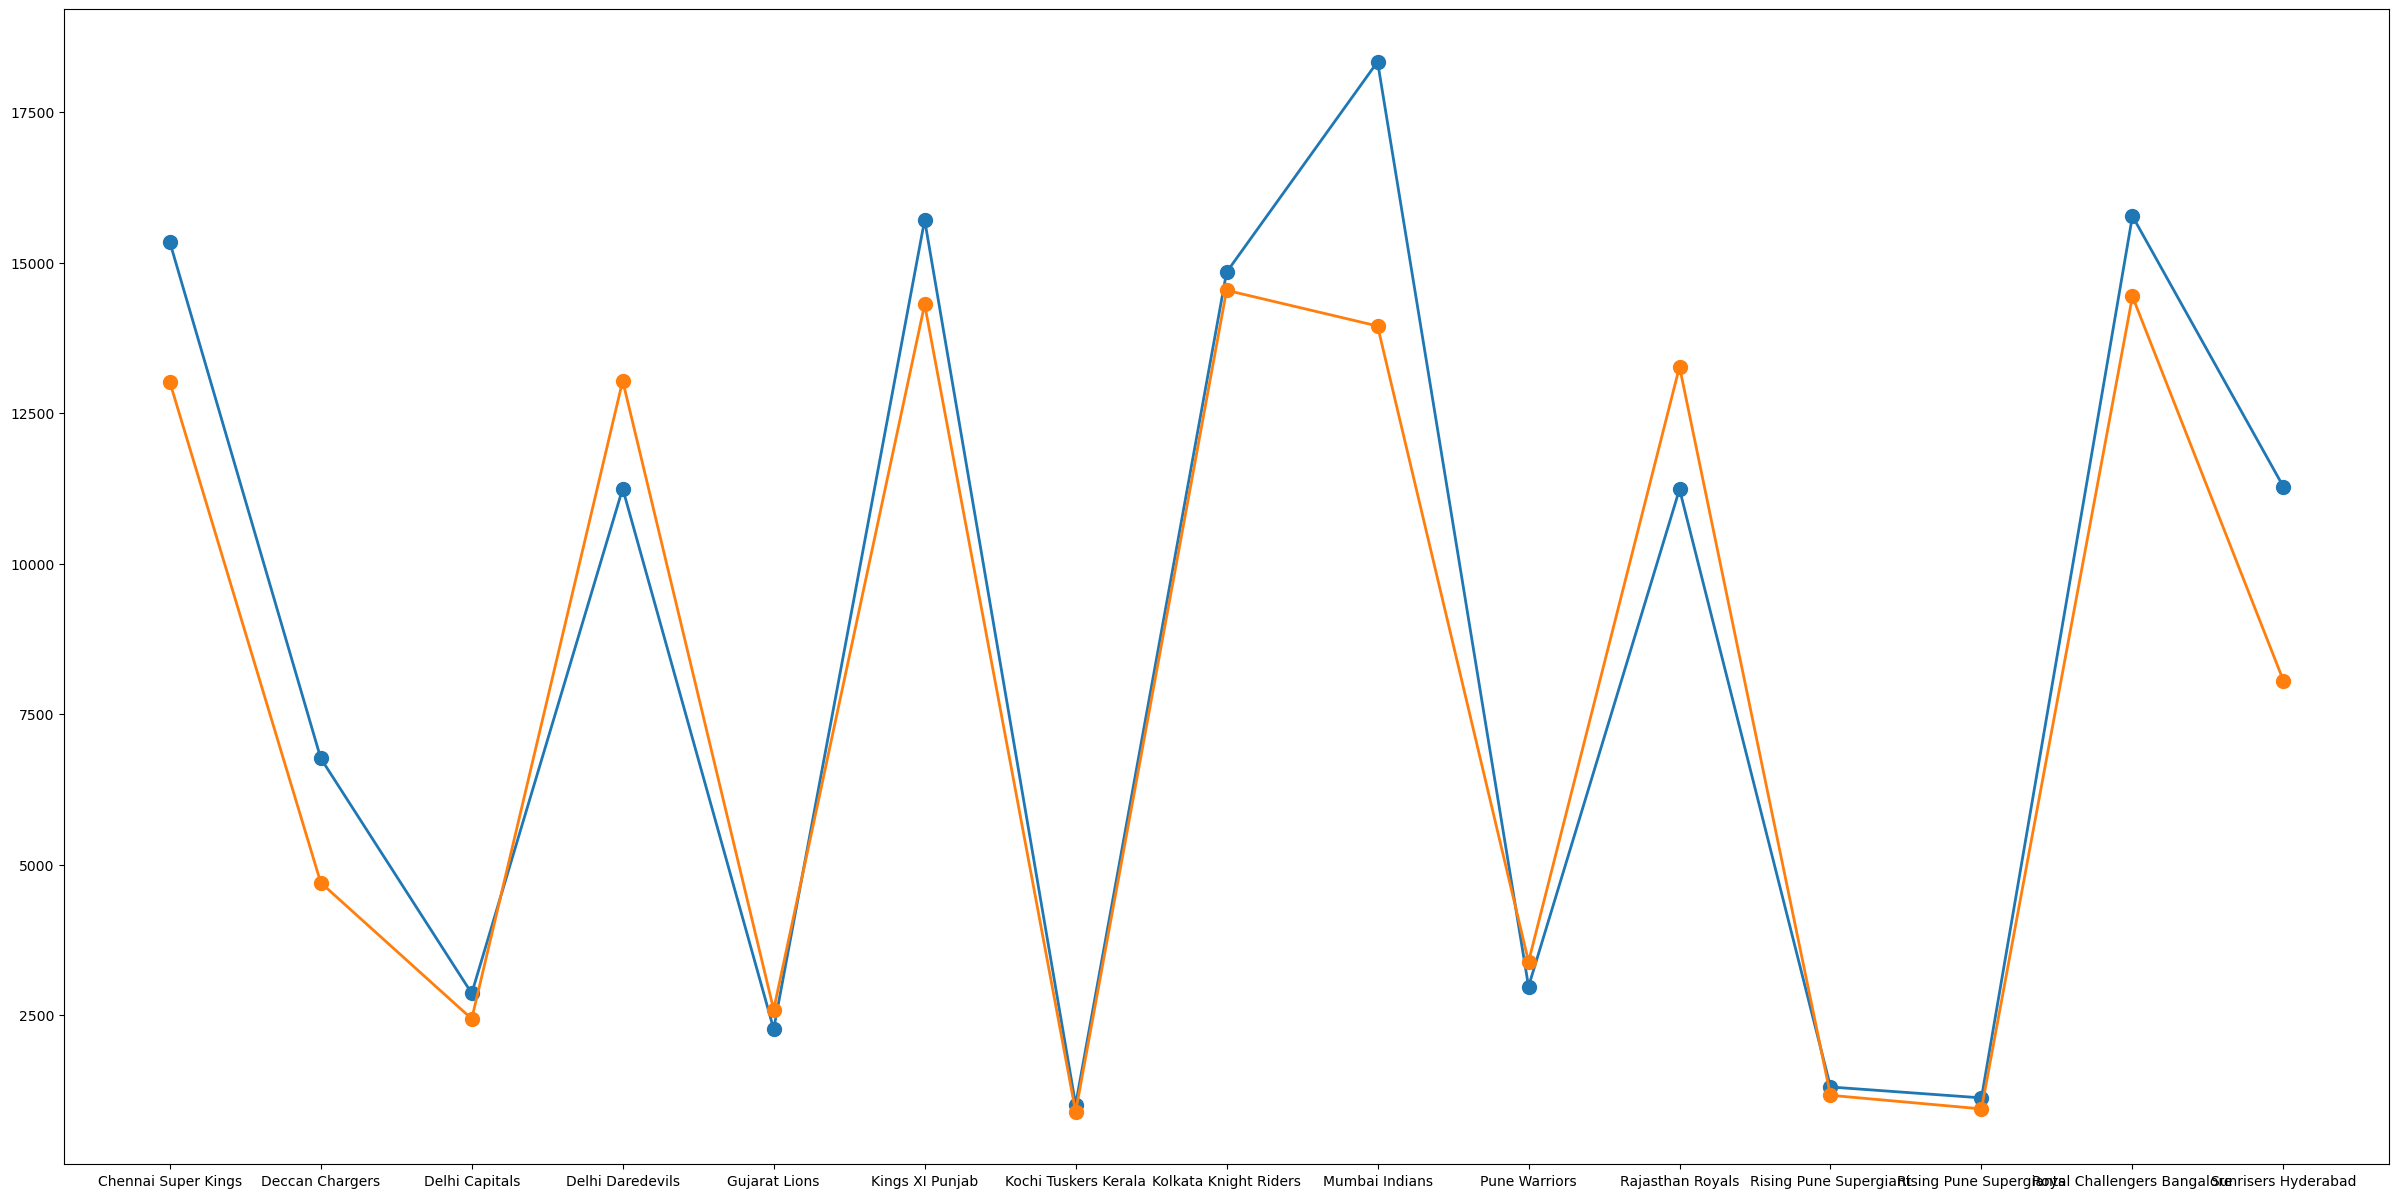

In [239]:
plt.figure(figsize=(30,15))
plt.plot(list(df_innings_wise_runs['team']), list(df_innings_wise_runs['runs_in_inning_1']), label = 'First Inning', marker = 'o', markersize = 10, linewidth = 2)
plt.plot(list(df_innings_wise_runs['team']), list(df_innings_wise_runs['runs_in_inning_2']), label = 'Second Inning', marker = 'o', markersize = 10, linewidth = 2)
plt.show()

## 16. Which team has scored the most number of 200+ scores?

In [245]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [266]:
df_total_runs_matchwise = df_ball_by_ball.groupby(['id', 'batting_team', 'inning'])['total_runs'].sum().unstack().reset_index()
df_total_runs_matchwise = df_total_runs_matchwise.fillna(0.0)
df_total_runs_matchwise.columns = ['match_id', 'team', 'runs_if_inning_1', 'runs_if_inning_2']
df_total_runs_matchwise['runs_in_match'] = df_total_runs_matchwise['runs_if_inning_1'] + df_total_runs_matchwise['runs_if_inning_2']
del df_total_runs_matchwise['runs_if_inning_1']
del df_total_runs_matchwise['runs_if_inning_2']
df_total_runs_matchwise

,match_id,team,runs_in_match
0,335982,Kolkata Knight Riders,222.0
1,335982,Royal Challengers Bangalore,82.0
2,335983,Chennai Super Kings,240.0
3,335983,Kings XI Punjab,207.0
4,335984,Delhi Daredevils,132.0
...,...,...,...
1625,1237178,Sunrisers Hyderabad,132.0
1626,1237180,Delhi Capitals,189.0
1627,1237180,Sunrisers Hyderabad,172.0
1628,1237181,Delhi Capitals,156.0


## What did we do?
- We firstly grouped the data by id, batting team and inning and performed total runs sum on it
- Now as we grouped by inning, every team had one inning runs as NaN
- We filled NaN with 0.0
- As only one column was required, we added the two columns and made a new column
- We then deleted the rest of the 2 columns

In [267]:
a = df_total_runs_matchwise[df_total_runs_matchwise['runs_in_match'] > 200].groupby('team').size().reset_index(name = 'times_scored_200+')
a

,team,times_scored_200+
0,Chennai Super Kings,15
1,Deccan Chargers,1
2,Delhi Capitals,2
3,Delhi Daredevils,5
4,Gujarat Lions,1
5,Kings XI Punjab,14
6,Kolkata Knight Riders,9
7,Mumbai Indians,13
8,Rajasthan Royals,9
9,Royal Challengers Bangalore,17


In [262]:
a.sort_values(by = 'times_scored_200+', ascending = False)

,team,times_scored_200+
9,Royal Challengers Bangalore,17
0,Chennai Super Kings,15
5,Kings XI Punjab,14
7,Mumbai Indians,13
10,Sunrisers Hyderabad,12
6,Kolkata Knight Riders,9
8,Rajasthan Royals,9
3,Delhi Daredevils,5
2,Delhi Capitals,2
1,Deccan Chargers,1


## Inference:
- RCB has scored 200+ runs most number of times (17)

## 17. Which team has conceded 200+ scores the most?

In [263]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [270]:
df_bowling_concede = df_ball_by_ball.groupby(['id', 'bowling_team', 'inning'])['total_runs'].sum().unstack().reset_index()
df_bowling_concede = df_bowling_concede.fillna(0.0)
df_bowling_concede.columns = ['match_id', 'bowling_team', 'conceded_in_inning_1', 'conceded_in_inning_2']
df_bowling_concede['runs_conceded'] = df_bowling_concede['conceded_in_inning_1'] + df_bowling_concede['conceded_in_inning_2']
del df_bowling_concede['conceded_in_inning_1']
del df_bowling_concede['conceded_in_inning_2']
df_bowling_concede

,match_id,bowling_team,runs_conceded
0,335982,Kolkata Knight Riders,82.0
1,335982,Royal Challengers Bangalore,222.0
2,335983,Chennai Super Kings,207.0
3,335983,Kings XI Punjab,240.0
4,335984,Delhi Daredevils,129.0
...,...,...,...
1623,1237178,Sunrisers Hyderabad,131.0
1624,1237180,Delhi Capitals,172.0
1625,1237180,Sunrisers Hyderabad,189.0
1626,1237181,Delhi Capitals,157.0


In [272]:
b = df_bowling_concede[df_bowling_concede['runs_conceded'] > 200].groupby('bowling_team').size().reset_index(name = 'times_conceded_200+')
b.sort_values(by = 'times_conceded_200+', ascending=False)

,bowling_team,times_conceded_200+
5,Kings XI Punjab,18
11,Royal Challengers Bangalore,17
0,Chennai Super Kings,12
3,Delhi Daredevils,10
6,Kolkata Knight Riders,9
9,Rajasthan Royals,9
7,Mumbai Indians,8
12,Sunrisers Hyderabad,6
4,Gujarat Lions,3
1,Deccan Chargers,2


## Inference:
- KXP have conceded 200+ runs most number of times (18) throught the season followed by RCB (17)

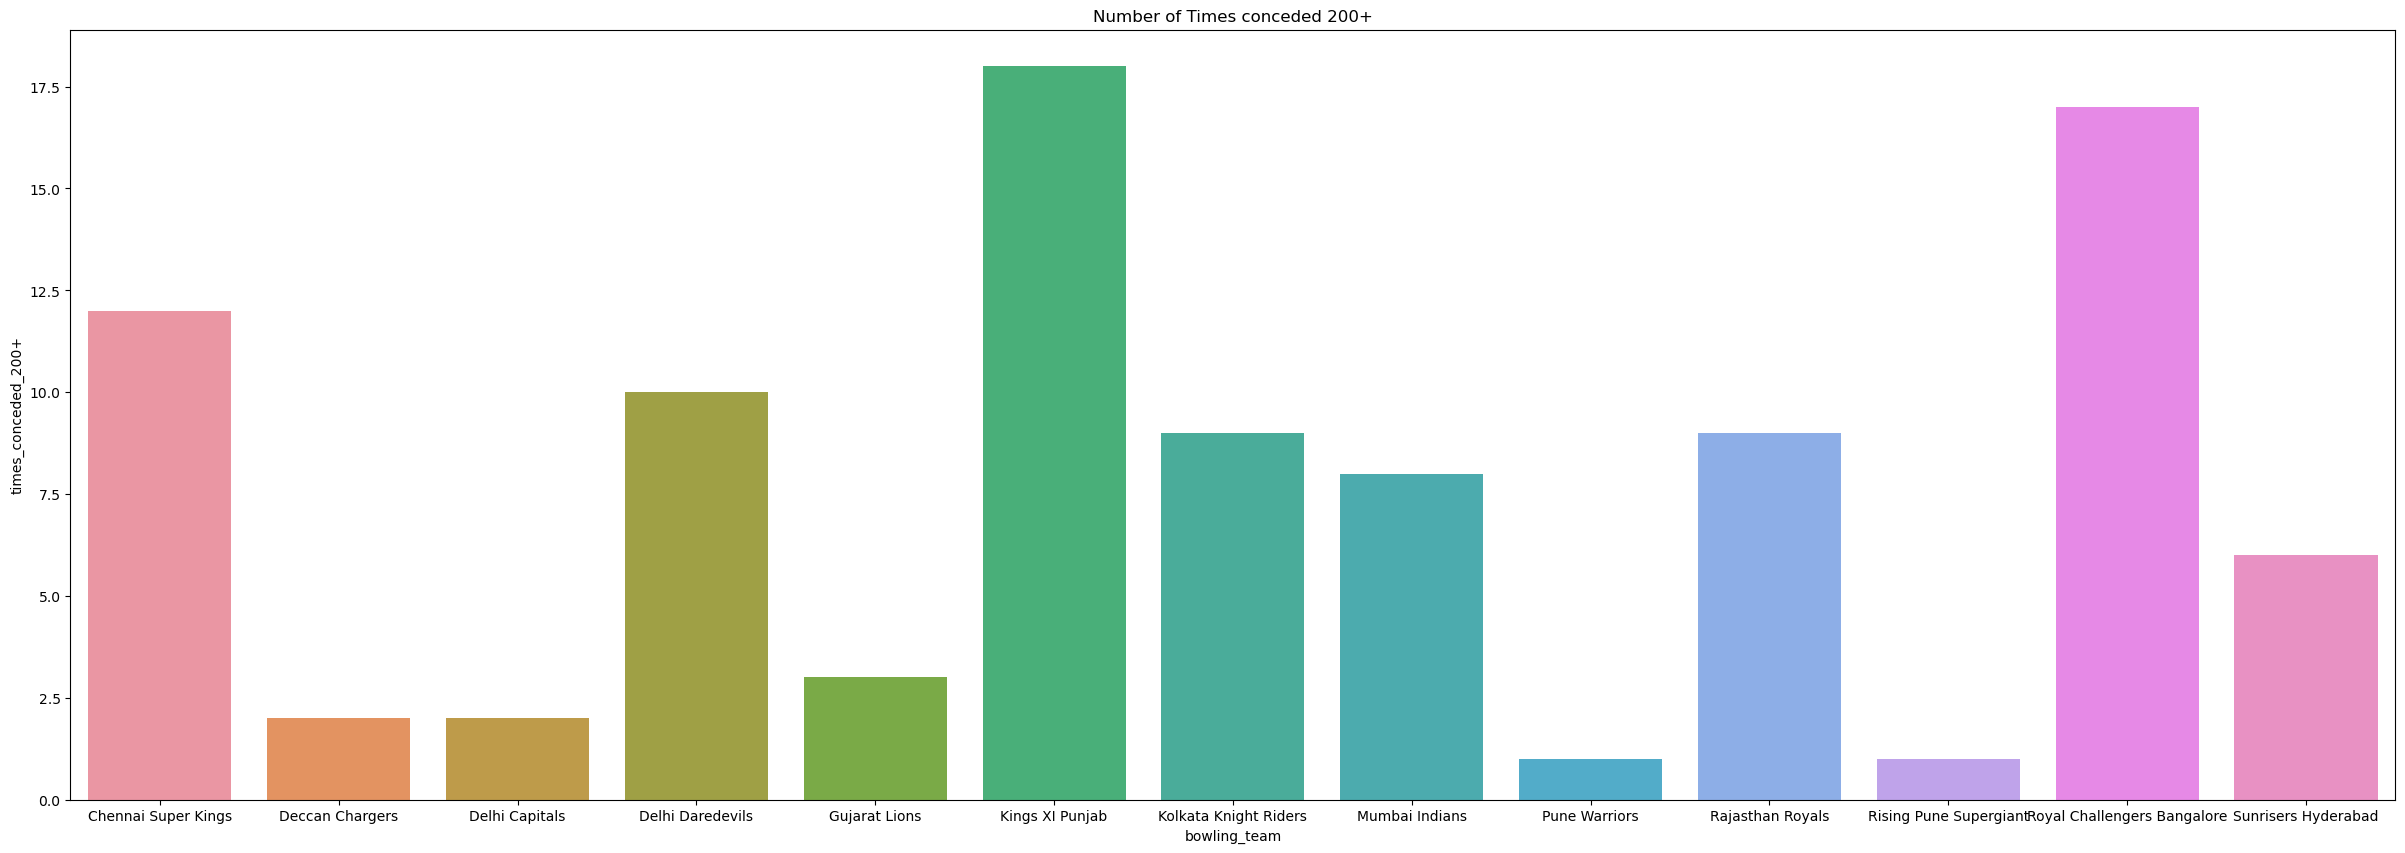

In [275]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'bowling_team', y = 'times_conceded_200+', data = b)
plt.title('Number of Times conceded 200+')
plt.show()

## 18. What was the highest run scored by a team in a single match?

In [299]:
df_total_runs_matchwise[df_total_runs_matchwise['runs_in_match'] == df_total_runs_matchwise['runs_in_match'].max()]

,match_id,team,runs_in_match
702,598027,Royal Challengers Bangalore,263.0


## Inference:
- RCB has scored the max runs in a single match (263) in match id 598027
- More details of this match is given below

In [301]:
df_matches[df_matches['id'] == 598027]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,130.0,N,NaN,Aleem Dar,C Shamshuddin,2013


## 19. Which is the biggest win in terms of run margin?

In [303]:
df_matches[df_matches['result_margin'] == df_matches['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


## Inference:
- The match id 108265 on 6/5/2017 in Feroz Shah Kotla stadium in Delhi between DD and MI had the greatest margin difference of 146 runs
- Here DD won the toss and decided to field and lost the match to MI

## 20. Which batsmen have played the most number of balls?

In [304]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [309]:
df_balls_faced = df_ball_by_ball.groupby('batsman')['ball'].size().reset_index(name = 'no_of_balls_played').sort_values(by = 'no_of_balls_played', ascending = False)
df_balls_faced

,batsman,no_of_balls_played
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
...,...,...
411,S Kaushik,1
506,V Pratap Singh,1
204,JL Denly,1
469,Shahbaz Ahmed,1


## Inference:
- Virat Kohli has played the maximum number of balls (4602) throughout all seasons of IPL

<AxesSubplot:xlabel='no_of_balls_played', ylabel='Count'>

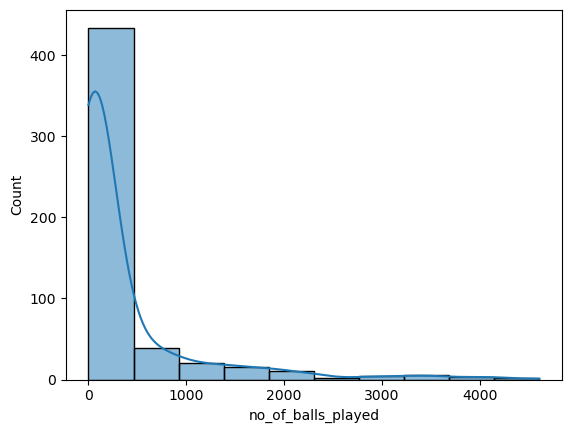

In [327]:
sns.histplot(data = df_balls_faced['no_of_balls_played'], bins = 10, kde=True)

## Inference:
- There are a very few players that have played more number of balls 
- Hence there are a lot of new players in every season of IPl
- Old and experienced players in IPL are very less

## 21. Who are the leading run-scorers of all time?

In [332]:
df_runs_by_batsman = df_ball_by_ball.groupby('batsman')['total_runs'].sum().reset_index(name = 'total_runs_scored').sort_values(by = 'total_runs_scored', ascending = False)
df_runs_by_batsman.head()

,batsman,total_runs_scored
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394


## Inference:
- Above are the top 5 leading scorers in IPL across all seasons

<AxesSubplot:ylabel='Count'>

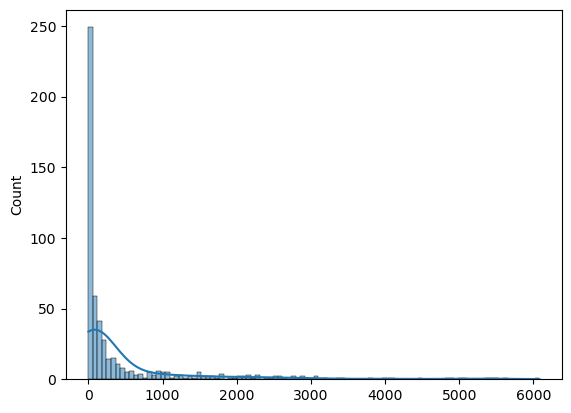

In [333]:
sns.histplot(data = list(df_runs_by_batsman['total_runs_scored']), bins = 100, kde = True)

## Inference:
- Most of the players have scored between 1-1000 runs only

## 22. Who has hit the most number of 4's?

In [334]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [340]:
df_ball_by_ball['batsman_runs'].unique()

array([1, 0, 2, 6, 4, 5, 3], dtype=int64)

In [345]:
df_ball_by_ball['extra_runs'].unique()

array([0, 4, 1, 2, 5, 3, 7], dtype=int64)

In [351]:
df_ball_by_ball[df_ball_by_ball['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].size().reset_index(name = 'no_of_4s').sort_values(by = 'no_of_4s', ascending = False)

,batsman,no_of_4s
329,S Dhawan,591
91,DA Warner,510
400,V Kohli,504
350,SK Raina,493
123,G Gambhir,492
...,...,...
107,DM Bravo,1
214,M Muralitharan,1
152,J Theron,1
395,UA Birla,1


## Inference:
- The data was very vague. We have assumed that if batsman runs are 4, then it is a 4
- If we are filtering with non_boundary = 1 then only 10 rows are coming as output
- Shikhar Dhawan has scored the most number of 4s (591) across all seasons

## 23. Who has hit the most number of 6's?

In [352]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [356]:
df_ball_by_ball[df_ball_by_ball['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].size().reset_index(name = 'no_of_6s').sort_values(by = 'no_of_6s', ascending = False).head()

,batsman,no_of_6s
63,CH Gayle,349
11,AB de Villiers,235
202,MS Dhoni,216
251,RG Sharma,214
332,V Kohli,202


## Inference:
- Chris Gayle has the most number of 6s (349) throughout all the seasons of IPL

## 24. Who has the highest strike rate?

In [357]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [358]:
df_balls_faced

,batsman,no_of_balls_played
505,V Kohli,4609
407,S Dhawan,4208
379,RG Sharma,4088
438,SK Raina,4041
116,DA Warner,3819
...,...,...
411,S Kaushik,1
506,V Pratap Singh,1
204,JL Denly,1
469,Shahbaz Ahmed,1


In [359]:
df_runs_by_batsman

,batsman,total_runs_scored
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
...,...,...
387,RR Bhatkal,0
91,C Nanda,0
413,S Lamichhane,0
506,V Pratap Singh,0


In [362]:
df_strike_rate = pd.merge(df_runs_by_batsman, df_balls_faced, on = 'batsman', how = 'inner')
df_strike_rate['strike_rate'] = round (df_strike_rate['total_runs_scored'] / df_strike_rate['no_of_balls_played'] * 100, 2)
df_strike_rate

,batsman,total_runs_scored,no_of_balls_played,strike_rate
0,V Kohli,6081,4609,131.94
1,SK Raina,5604,4041,138.68
2,DA Warner,5522,3819,144.59
3,S Dhawan,5452,4208,129.56
4,RG Sharma,5394,4088,131.95
...,...,...,...,...
532,RR Bhatkal,0,2,0.00
533,C Nanda,0,1,0.00
534,S Lamichhane,0,1,0.00
535,V Pratap Singh,0,1,0.00


In [363]:
df_strike_rate.sort_values(by = 'strike_rate', ascending = False)

,batsman,total_runs_scored,no_of_balls_played,strike_rate
470,B Stanlake,5,2,250.00
315,Umar Gul,44,19,231.58
462,KMDN Kulasekara,6,3,200.00
477,RS Sodhi,4,2,200.00
354,ER Dwivedi,29,15,193.33
...,...,...,...,...
523,IC Pandey,0,2,0.00
522,L Ablish,0,2,0.00
521,SS Cottrell,0,2,0.00
520,JL Denly,0,1,0.00


## Inference:
- This is not a good criteria to judge a player as players have faced different amount of balls
- Those who have played less number of balls, their strike rate would be high
- According to the data, B Stanlake has the highest strike rate of 250 with only 5 runs scored in 2 balls

## 25. Who is the leading wicket-taker?

In [364]:
df_ball_by_ball

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [367]:
df_ball_by_ball['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

## Observation:
- Seeing all the unique kind of dismissals
- Only run_out is not given to the bowler as a wicket taken, hence we will remove run out records and calculate

In [368]:
d = df_ball_by_ball[df_ball_by_ball['is_wicket'] == 1]

In [369]:
e = d[d['dismissal_kind'] != 'run out']
e

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
32,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,0,1,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
64,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,0,1,caught,DJ Hussey,CL White,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
112,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,0,1,caught,SC Ganguly,JH Kallis,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
132,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,0,1,caught,MV Boucher,M Kartik,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
135,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,0,1,caught,B Akhil,RT Ponting,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193375,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals
193381,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,0,1,caught,AR Patel,AS Roy (sub),NaN,Delhi Capitals,Mumbai Indians
193386,1237181,1,0,1,MP Stoinis,S Dhawan,TA Boult,0,0,0,0,1,caught,MP Stoinis,Q de Kock,NaN,Delhi Capitals,Mumbai Indians
193401,1237181,1,2,4,AM Rahane,S Dhawan,TA Boult,0,0,0,0,1,caught,AM Rahane,Q de Kock,NaN,Delhi Capitals,Mumbai Indians


## Observation:
- filtering by is_wicket = 1 and then by all the records which have not been dismissed by run out

In [371]:
e.groupby('bowler')['is_wicket'].size().reset_index(name = 'wickets_taken').sort_values(by = 'wickets_taken', ascending = False).head()

,bowler,wickets_taken
297,SL Malinga,170
5,A Mishra,160
235,PP Chawla,156
85,DJ Bravo,153
115,Harbhajan Singh,150


## Inference:
- The top leading wicket takers are as above. SL Malinga tops the list with 170 wickets throughout the season
- The records when included run out, varied a lot. In these results, run out is not considered as a wicket

## 26. Which stadium has hosted the most number of matches?

In [372]:
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [375]:
df_matches.groupby('venue').size().reset_index(name = 'no_of_hostings').sort_values(by = 'no_of_hostings', ascending = False).head()

,venue,no_of_hostings
7,Eden Gardens,77
8,Feroz Shah Kotla,74
35,Wankhede Stadium,73
14,M Chinnaswamy Stadium,65
24,"Rajiv Gandhi International Stadium, Uppal",64


## Inference:
- Eden Gardens has hosted the most number of matches (77)
- The top 5 hosts are given above